## Strategies to Pay Equity: A Cross-Regional Analysis Based on Data

### Business Understanding

**1. Executive Summary**
   
The issue of gender pay gap is on a consistent basis a point of concern in the UK as the country has continued to pursue equality in the workplace. This project aims to provide a complete view of the complex factors contributing to pay inequality. Through an analysis of employer-provided data under the UK Gender Pay Gap reporting scheme with qualitative insights gathered from a newly designed employee perception survey for Indian multinational corporations (MNCs) The UK data set includes important indicators including average hourly pay variations, bonus allocations, gender representation in every pay quartile, company size, industry grouping, and reporting adherence (GOV.UK, 2024). The analysis of these variables is expected to reveal a hidden pattern and differences in sectors which display a difference in the wages. The research will be presented in a data-driven manner and aims to offer insights that could guide policymakers, organisations and stakeholders to establish even better approaches to deal with pay gaps and achieve more fair employment strategies in the UK labour market. (EHRC, 2023; ILO, 2022)




**2. Problem Statement**
   
The issue of gender pay gap is, on a consistent basis, a point of concern in every country but the UK as the country has continued to pursue equality in the workplace and they are required to report their pay gap, and that is a good thing when it comes to transparency (GOV.UK, 2024). However simply knowing the figures isn't enough. We need to understand why these gaps exist whether women are in lower-paying occupations, not getting promoted as easily into higher level jobs, or if there are unofficial biases in performance and compensation decision making (OECD, 2023; CIPD, 2023). Those are the "unexplained" percentages of the pay gap. There is another portrait in nations such as India, especially in giant multinational companies. We have in this case cultural issues, trend of the market, and policies of the company globally that are at stake, and we sometimes do not have as much public data. It's not just about the numbers; it's also about how employees feel about their compensation, whether they feel fairness, and whether they are exposed to any sort of bias. If we take only the figures and not the actual experience of people, our effort at improving things can be misguided. This project is a pursuit to balance both these urgent points of view so that we can notice the problem in a better perspective and act accordingly.
Research Aim:
This research aims to investigate and predict the factors underlying unexplained wage disparities within UK organisations through the application of machine learning techniques on large-scale employer-reported data (Kuhn & Johnson, 2019).
Simultaneously, the Indian employee survey, detailed in the "Employee Pay Equity & Workplace Experience Questionnaire" google document, will capture crucial insights into employee perceptions of fairness, transparency, career progression, and bias (Budhwar & Bhatnagar, 2020).     

**3. Research Questions**


1. What is the scope and pattern of gender wage differences across various sectors and company sizes within the UK?
2. How are organisational features related to documented gender wage disparities, as revealed through predictive analytical approaches?
3. What are the primary factors contributing to the unexplained variance in gender remuneration differences?
4. How do different machine learning models perform in predicting gender wage disparities, and how interpretable are their results?
5. What are Indian employees' attitudes towards pay equity, career growth, work-life balance, and bias experiences in multinational corporations?


In [48]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
file_path = r"D:\Final Project\UK Gender Pay Gap Data - 2024 to 2025.csv"  # Option 1: raw string

df = pd.read_csv(file_path)

# Preview the dataset
df.head()


EmployerName  EmployerId  \
0  'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...       19070   
1               "RED BAND" CHEMICAL COMPANY, LIMITED       16879   
2                    10 TRINITY SQUARE HOTEL LIMITED       19455   
3                                       10442565 LTD       19491   
4                                         1509 GROUP       15320   

                                             Address  PostCode CompanyNumber  \
0  Aberystwyth University, Penglais, Ceredigion, ...  SY23 3FL      RC000641   
1   19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU   EH6 8NU      SC016876   
2  5 Market Yard Mews, 194-204 Bermondsey Street,...   SE1 3TQ      08064685   
3  Compass House 17-19 Empringham Street, Kingsto...   HU9 1RP      10442565   
4  Royal Grammar School, High Street, Guildford, ...   GU1 3BB      04104101   

        SicCodes  DiffMeanHourlyPercent  DiffMedianHourlyPercent  \
0            NaN                   9.17                     2.90   
1          47730                   8.75                    -4.96   
2          82990                  -2.20                     8.40   
3          70229                  11.00                     3.60   
4  85200,\n85310                  20.12                    17.48   

   DiffMeanBonusPercent  DiffMedianBonusPercent  ...  \
0                  7.50                    0.00  ...   
1                 20.83                   36.88  ...   
2                -93.90                    0.00  ...   
3                 26.10                    4.90  ...   
4                   NaN                     NaN  ...   

   FemaleUpperMiddleQuartile  MaleTopQuartile  FemaleTopQuartile  \
0                      60.33            53.62              46.38   
1                      89.50            26.10              73.90   
2                      34.00            63.00              37.00   
3                      33.20            60.00              40.00   
4                      52.94            73.53              26.47   

                                CompanyLinkToGPGInfo  \
0  https://www.aber.ac.uk/en/equality/equality-re...   
1                                                NaN   
2           https://www.fourseasons.com/towerbridge/   
3                                                NaN   
4                              http://www.rgsg.co.uk   

                                ResponsiblePerson  EmployerSize  \
0                  Dylan Jones (dej20@aber.ac.uk)  1000 to 4999   
1               Osmond Ramsay (Managing Director)    250 to 499   
2  Linda Stigter (Director of People and Culture)    250 to 499   
3                     David Maccormack (Director)  1000 to 4999   
4                     Catherine Perceval (Bursar)    250 to 499   

                                         CurrentName  \
0  'PRIFYSGOL ABERYSTWYTH' AND 'ABERYSTWYTH UNIVE...   
1               "RED BAND" CHEMICAL COMPANY, LIMITED   
2                    10 TRINITY SQUARE HOTEL LIMITED   
3                                       10442565 LTD   
4                                         1509 GROUP   

   SubmittedAfterTheDeadline           DueDate     DateSubmitted  
0                      False  05-04-2025 00:00  28-03-2025 09:02  
1                       True  05-04-2025 00:00  11-04-2025 07:57  
2                      False  05-04-2025 00:00  21-01-2025 14:19  
3                      False  05-04-2025 00:00  03-04-2025 12:14  
4                      False  05-04-2025 00:00  28-03-2025 11:23  

[5 rows x 27 columns]

In [49]:
# --- UK Gender Pay Gap: robust cleaning ---
import os, re
import numpy as np
import pandas as pd

# 0) Load if df not already present
if "df" not in globals():
    CANDIDATES = [
        r"D:\Final Project\UK Gender Pay Gap Data - 2024 to 2025.csv",
        r"D:\Final Project\UK Gender Pay Gap Data.csv",
        "UK Gender Pay Gap Data - 2024 to 2025.csv",
        "UK Gender Pay Gap Data.csv",
    ]
    path = next((p for p in CANDIDATES if os.path.exists(p)), None)
    if path is None:
        raise FileNotFoundError("Provide df or place the UK GPG CSV at one of:\n- " + "\n- ".join(CANDIDATES))
    df = pd.read_csv(path)

# 1) Ensure key columns exist
needed_cols = [
    "EmployerName","CurrentName","DateSubmitted","DueDate","PostCode",
    "DiffMeanHourlyPercent","DiffMedianHourlyPercent",
    "DiffMeanBonusPercent","DiffMedianBonusPercent",
    "MaleTopQuartile","FemaleTopQuartile",
    "MaleLowerQuartile","MaleLowerMiddleQuartile","MaleUpperMiddleQuartile",
    "FemaleLowerQuartile","FemaleLowerMiddleQuartile","FemaleUpperMiddleQuartile","FemaleTopQuartile",
    "EmployerSize","SicCodes","BonusDataAvailable","TopQuartileType"
]
for col in needed_cols:
    if col not in df.columns:
        df[col] = np.nan  # prevents KeyErrors later

# 2) Company names: remove quotes/spaces
for col in ["EmployerName","CurrentName"]:
    df[col] = df[col].astype(str).str.replace(r"['\"]", "", regex=True).str.strip()

# 3) Dates (UK day-first)
df["DateSubmitted"] = pd.to_datetime(df["DateSubmitted"], errors="coerce", dayfirst=True)
df["DueDate"]       = pd.to_datetime(df["DueDate"],       errors="coerce", dayfirst=True)

# 4) Normalize BonusDataAvailable (prefer true/false; or infer from bonus % columns)
if "BonusDataAvailable" in df.columns:
    df["BonusDataAvailable"] = (
        df["BonusDataAvailable"]
        .astype(str).str.strip().str.lower()
        .map({"true": True, "false": False, "yes": True, "no": False})
    )
# If still missing, infer as "any bonus % reported"
mask_bonus = df[["DiffMeanBonusPercent","DiffMedianBonusPercent"]].notna().any(axis=1)
df.loc[df["BonusDataAvailable"].isna(), "BonusDataAvailable"] = mask_bonus

# 5) % strings → numeric
percent_cols = [
    "DiffMeanHourlyPercent","DiffMedianHourlyPercent",
    "DiffMeanBonusPercent","DiffMedianBonusPercent",
    "MaleTopQuartile","FemaleTopQuartile",
    "MaleLowerQuartile","MaleLowerMiddleQuartile","MaleUpperMiddleQuartile","MaleTopQuartile",
    "FemaleLowerQuartile","FemaleLowerMiddleQuartile","FemaleUpperMiddleQuartile","FemaleTopQuartile",
]
for c in percent_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace("%","", regex=False), errors="coerce")

# 6) Derive imbalance & TopQuartileType (+/-10pp rule)
df["TopQuartileImbalance"] = pd.to_numeric(df["MaleTopQuartile"], errors="coerce") - pd.to_numeric(df["FemaleTopQuartile"], errors="coerce")
if df["TopQuartileType"].isna().all():
    df["TopQuartileType"] = df["TopQuartileImbalance"].apply(
        lambda x: ("Male-Dominated" if x > 10 else ("Female-Dominated" if x < -10 else "Balanced")) if pd.notna(x) else np.nan
    )

# 7) Employer size ordering (UK bands)
size_order = ["Less than 250","250 to 499","500 to 999","1000 to 4999","5000 to 19,999","20,000 or more"]
if "EmployerSize" in df.columns:
    df["EmployerSize"] = df["EmployerSize"].astype("string").str.strip()
    df["EmployerSize"] = pd.Categorical(df["EmployerSize"], categories=size_order, ordered=True)

# 8) SIC codes: tidy list
df["SicCodes"] = (
    df["SicCodes"].astype(str)
    .str.replace("\n","", regex=False)
    .str.replace(";"," , ", regex=False)  # unify delimiters
    .str.split(",")
    .apply(lambda lst: [s.strip() for s in lst if isinstance(s,str) and s.strip()] if isinstance(lst, list) else [])
)

# 9) UK postcode tidy (simple normaliser: uppercase, single space before last 3 chars if looks valid length)
if "PostCode" in df.columns:
    def tidy_postcode(x):
        if pd.isna(x): return np.nan
        s = re.sub(r"\s+","", str(x)).upper()
        if len(s) >= 5 and len(s) <= 8:
            return s[:-3] + " " + s[-3:]
        return s
    df["PostCode"] = df["PostCode"].apply(tidy_postcode)

# 10) Types
for c in ["TopQuartileType","BonusDataAvailable"]:
    if c in df.columns:
        df[c] = df[c].astype("category")

# 11) Summary (treat datetimes as numeric if supported)
print("\nSummary stats:")
try:
    print(df.describe(include="all", datetime_is_numeric=True).transpose())
except TypeError:
    print(df.describe(include="all").transpose())


Summary stats:
                             count unique  \
EmployerName                 11235  11235   
EmployerId                 11235.0    NaN   
Address                      11201   9827   
PostCode                     11177   8211   
CompanyNumber                 9752   9752   
SicCodes                     11235   2131   
DiffMeanHourlyPercent      11235.0    NaN   
DiffMedianHourlyPercent    11235.0    NaN   
DiffMeanBonusPercent        8519.0    NaN   
DiffMedianBonusPercent      8519.0    NaN   
MaleBonusPercent           11235.0    NaN   
FemaleBonusPercent         11235.0    NaN   
MaleLowerQuartile          11235.0    NaN   
FemaleLowerQuartile        11235.0    NaN   
MaleLowerMiddleQuartile    11235.0    NaN   
FemaleLowerMiddleQuartile  11235.0    NaN   
MaleUpperMiddleQuartile    11235.0    NaN   
FemaleUpperMiddleQuartile  11235.0    NaN   
MaleTopQuartile            11235.0    NaN   
FemaleTopQuartile          11235.0    NaN   
CompanyLinkToGPGInfo          6048   50

In [51]:
# Make sure size bands are ordered (UK bands)
size_order = ["Less than 250","250 to 499","500 to 999",
              "1000 to 4999","5000 to 19,999","20,000 or more"]
df["EmployerSize"] = pd.Categorical(df["EmployerSize"], categories=size_order, ordered=True)

# Ensure the pay-gap columns are numeric
for c in ["DiffMeanHourlyPercent", "DiffMedianHourlyPercent"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Group and mean — observed=True silences the warning and adopts the future default
size_group = (
    df.groupby("EmployerSize", observed=True)[["DiffMeanHourlyPercent", "DiffMedianHourlyPercent"]]
      .mean()
      .reindex(size_order)   # keep the intended order
)

print("Pay Gap by Employer Size:")
print(size_group.round(4))

Pay Gap by Employer Size:
                DiffMeanHourlyPercent  DiffMedianHourlyPercent
EmployerSize                                                  
Less than 250                 10.9422                   8.3084
250 to 499                    12.1967                  11.7305
500 to 999                    12.3873                  12.1397
1000 to 4999                  11.3614                  10.4318
5000 to 19,999                12.0617                   9.0164
20,000 or more                10.6384                   7.2265


In [4]:
# Pay gap based on bonus data availability
bonus_group = df.groupby('BonusDataAvailable')[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']].mean()
print("\nPay Gap by Bonus Reporting:")
print(bonus_group)


Pay Gap by Bonus Reporting:
                    DiffMeanHourlyPercent  DiffMedianHourlyPercent
BonusDataAvailable                                                
False                           10.582758                13.555930
True                            12.448577                10.522212


In [5]:
# Classify companies by gender dominance in top roles
def classify_quartile(value):
    if value > 10:
        return 'Male-Dominated'
    elif value < -10:
        return 'Female-Dominated'
    else:
        return 'Balanced'

df['TopQuartileType'] = df['TopQuartileImbalance'].apply(classify_quartile)

# 4.4 Compare average pay gap by quartile type
quartile_group = df.groupby('TopQuartileType')[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']].mean()
print("\nPay Gap by Gender Dominance in Top Roles:")
print(quartile_group)


Pay Gap by Gender Dominance in Top Roles:
                  DiffMeanHourlyPercent  DiffMedianHourlyPercent
TopQuartileType                                                 
Balanced                       9.310933                 7.763715
Female-Dominated              10.827453                11.328697
Male-Dominated                13.275167                12.022259


In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv(r'D:\Final Project\UK Gender Pay Gap Data.csv')

# Drop unnecessary columns
columns_to_drop = [
    'EmployerName', 'EmployerId', 'Address', 'PostCode', 'CompanyNumber',
    'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'CurrentName',
    'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'
]
df_clean = df.drop(columns=columns_to_drop).copy()

# Impute missing numerical values (handle both int and float)
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

# Impute missing categorical values
cat_cols = df_clean.select_dtypes(include=['object', 'bool']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

# Convert selected columns to category types (only if they exist in dataset)
for col in ['EmployerSize', 'TopQuartileType', 'BonusDataAvailable']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# Preview cleaned dataset
df_clean.head()

SicCodes  DiffMeanHourlyPercent  DiffMedianHourlyPercent  \
0             ['nan']                   9.17                     2.90   
1           ['47730']                   8.75                    -4.96   
2           ['82990']                  -2.20                     8.40   
3           ['70229']                  11.00                     3.60   
4  ['85200', '85310']                  20.12                    17.48   

   DiffMeanBonusPercent  DiffMedianBonusPercent  MaleBonusPercent  \
0                  7.50                    0.00               6.0   
1                 20.83                   36.88              24.6   
2                -93.90                    0.00              39.2   
3                 26.10                    4.90               3.0   
4                 29.10                   14.80               0.0   

   FemaleBonusPercent  MaleLowerQuartile  FemaleLowerQuartile  \
0                 3.3              47.73                52.27   
1                75.4              56.20                43.80   
2                58.6              66.00                34.00   
3                 2.0              76.30                23.70   
4                 0.0              30.43                69.57   

   MaleLowerMiddleQuartile  FemaleLowerMiddleQuartile  \
0                    40.17                      59.83   
1                    23.90                      76.10   
2                    46.00                      54.00   
3                    69.60                      30.40   
4                    39.71                      60.29   

   MaleUpperMiddleQuartile  FemaleUpperMiddleQuartile  MaleTopQuartile  \
0                    39.67                      60.33            53.62   
1                    10.50                      89.50            26.10   
2                    66.00                      34.00            63.00   
3                    66.80                      33.20            60.00   
4                    47.06                      52.94            73.53   

   FemaleTopQuartile  EmployerSize BonusDataAvailable  TopQuartileImbalance  \
0              46.38  1000 to 4999               True                  7.24   
1              73.90    250 to 499               True                -47.80   
2              37.00    250 to 499               True                 26.00   
3              40.00  1000 to 4999               True                 20.00   
4              26.47    250 to 499              False                 47.06   

    TopQuartileType  
0          Balanced  
1  Female-Dominated  
2    Male-Dominated  
3    Male-Dominated  
4    Male-Dominated

In [7]:
# Save the Cleaned Data
df.to_csv("D:\\Final Project\\UK Gender Pay Gap Data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


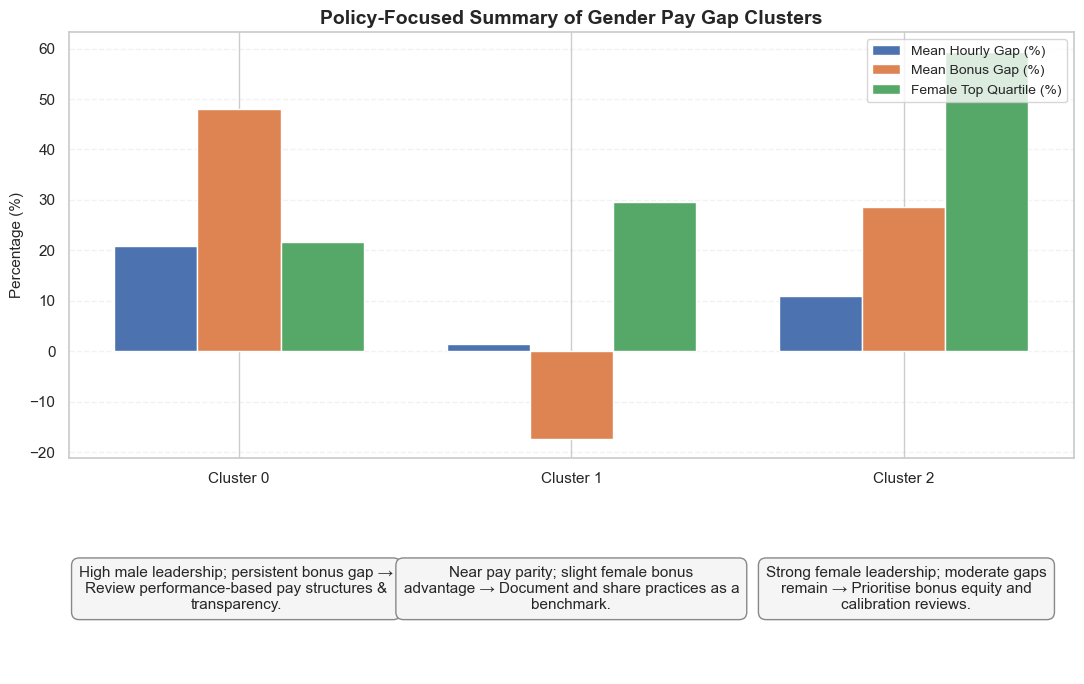

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Data
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
mean_hourly_gap = [20.95, 1.51, 10.87]
mean_bonus_gap = [47.96, -17.40, 28.59]
female_top_quartile = [21.58, 29.58, 59.38]

policies = [
    "High male leadership; persistent bonus gap → Review performance-based pay structures & transparency.",
    "Near pay parity; slight female bonus advantage → Document and share practices as a benchmark.",
    "Strong female leadership; moderate gaps remain → Prioritise bonus equity and calibration reviews."
]

# Figure with two vertical panels: bars (top) and policy text (bottom)
fig = plt.figure(figsize=(11, 7))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[3, 1.2])

# --- Top panel: grouped bar chart ---
ax1 = fig.add_subplot(gs[0, 0])

x = np.arange(len(clusters))
width = 0.25

ax1.bar(x - width, mean_hourly_gap, width, label='Mean Hourly Gap (%)')
ax1.bar(x,         mean_bonus_gap, width, label='Mean Bonus Gap (%)')
ax1.bar(x + width, female_top_quartile, width, label='Female Top Quartile (%)')

ax1.set_xticks(x)
ax1.set_xticklabels(clusters, fontsize=11)
ax1.set_ylabel('Percentage (%)', fontsize=11)
ax1.set_title('Policy-Focused Summary of Gender Pay Gap Clusters', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.25)

# --- Bottom panel: policy text boxes, aligned under each cluster ---
ax2 = fig.add_subplot(gs[1, 0])
ax2.axis('off')

# Create three equal columns for the policy notes
for i, policy in enumerate(policies):
    # Wrap text to fit neatly
    wrapped = "\n".join(textwrap.wrap(policy, width=45))
    # Compute box position (as a fraction of the axes width)
    x_pos = (i + 0.5) / 3.0   # centers at ~1/6, 3/6, 5/6
    ax2.text(
        x_pos, 0.5, wrapped,
        ha='center', va='center', fontsize=11,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#f5f5f5', edgecolor='#888888')
    )

# Tight layout so boxes don't overlap
plt.tight_layout()
plt.show()

In [59]:
# --- VERIFY SIC→Sector mapping actually produced values
import pandas as pd

print("Has 'Sector' column? ", "Sector" in df.columns)
print("Rows:", len(df))
print("Non-missing Sector:", df["Sector"].notna().sum())

# Peek at a few rows
display(df[["SicCodes","SIC2","Sector"]].head(8))

# Sector summary (useful for RQ1)
sector_stats = (df
    .groupby("Sector", dropna=False)["DiffMeanHourlyPercent"]
    .agg(count="count", median="median", mean="mean", std="std")
    .sort_values("median", ascending=False))
display(sector_stats.head(12))

Has 'Sector' column?  True
Rows: 11235
Non-missing Sector: 9334


SicCodes  SIC2                                    Sector
0                  [nan]   NaN                                       NaN
1                [47730]  47.0      G - Wholesale & retail; motor repair
2                [82990]  82.0              N - Admin & support services
3                [70229]  70.0  M - Professional, scientific & technical
4         [85200, 85310]  85.0                             P - Education
5  [93110, 93130, 93290]  93.0      R - Arts, entertainment & recreation
6                [78109]  78.0              N - Admin & support services
7         [86900, 88100]  86.0            Q - Human health & social work

count  median       mean        std
Sector                                                                       
K - Financial & insurance                   512  22.400  22.624043  12.356499
F - Construction                            323  19.660  19.647616  12.879472
P - Education                               998  16.500  15.510862  10.426061
M - Professional, scientific & technical    784  15.315  15.495013  12.638798
J - Information & communication             622  15.075  14.807283  11.385826
D - Electricity, gas, steam & air con        67  13.300  14.180597  10.950925
G - Wholesale & retail; motor repair        965  11.500  12.167559  13.708153
L - Real estate                             132  11.250  12.764091  13.999749
U - Extraterritorial organisations           13  11.100  12.500769  10.438744
NaN                                        1901  10.700  11.772967  10.191468
S - Other service activities                208   9.950  10.538154  12.283124
R - Arts, entertainment & recreation        258   9.750  18.821163  26.540758

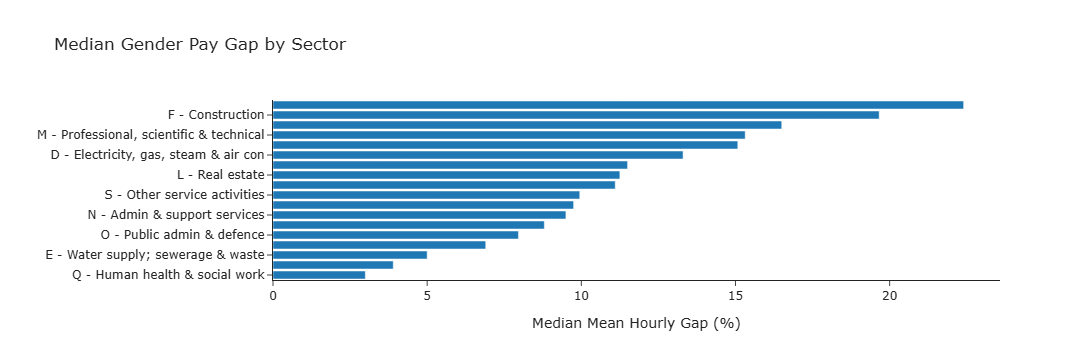

Rows used: 9,334


Model  MAE (mean)  MAE (sd)  R² (mean)  R² (sd)   n
3       XGBoost        6.05      0.13       0.51     0.02  25
2  RandomForest        6.14      0.14       0.50     0.02  25
1    ElasticNet        6.71      0.19       0.42     0.02  25
0  BaselineMean       10.22      0.24      -0.00     0.00  25

Best model: XGBoost


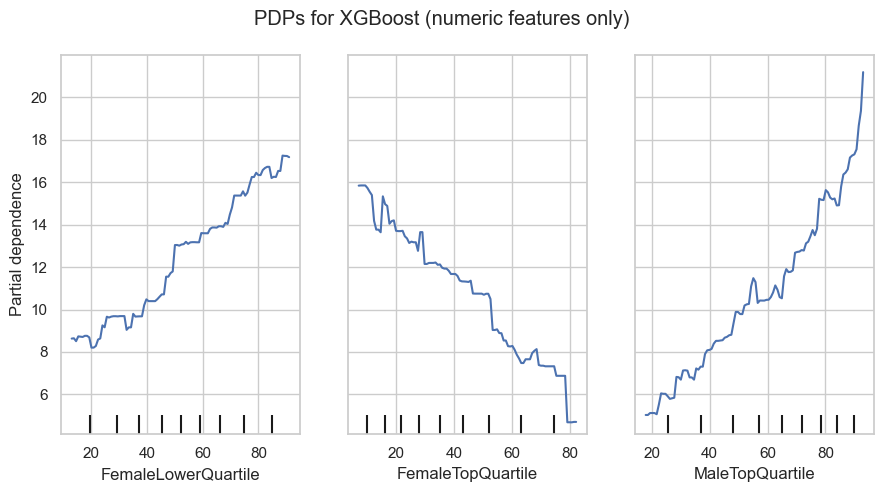

count  mean  median   std
Sector                                                          
U - Extraterritorial organisations         1  8.39    8.39   NaN
O - Public admin & defence                 6  5.89    0.73 21.27
J - Information & communication          125  1.83    0.64  8.01
E - Water supply; sewerage & waste         8  1.76   -2.68 28.61
L - Real estate                           27  1.61    1.24  6.88
D - Electricity, gas, steam & air con     13  1.52   -0.49  5.85
G - Wholesale & retail; motor repair     204  1.00    0.08 12.71
N - Admin & support services             218  0.48   -0.40 13.45
C - Manufacturing                        295  0.21   -0.15  9.04
I - Accommodation & food service          96  0.05   -0.18  5.37

count  mean  median   std
EmployerSize                             
Less than 250      82  4.32   -0.11 23.89
1000 to 4999      382  0.12   -0.57  8.59
250 to 499        842  0.01   -0.47  9.92
500 to 999        495 -0.27   -0.75  8.24
20,000 or more     10 -1.73   -0.57  5.28
5000 to 19,999     56 -1.83   -1.83  5.11

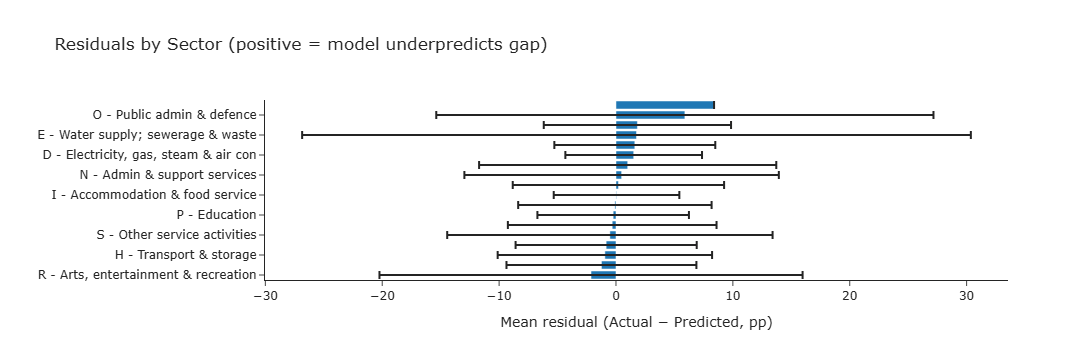

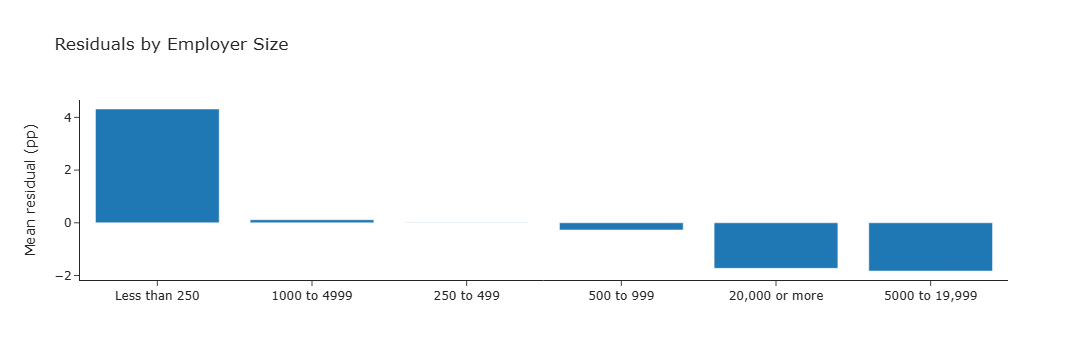

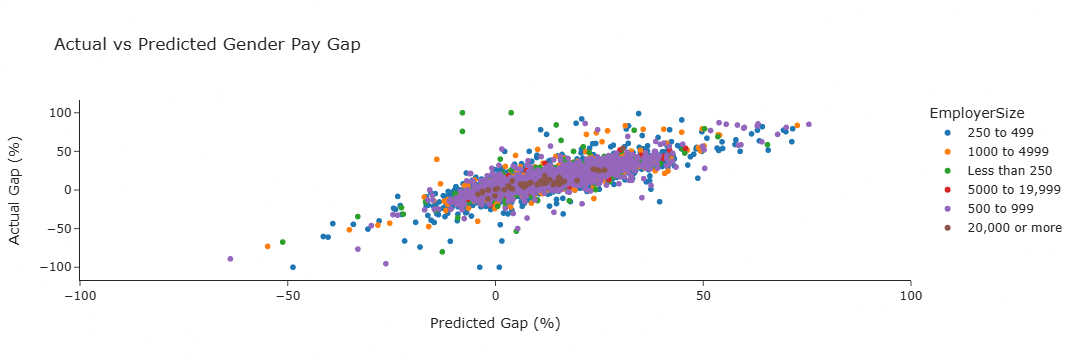

In [85]:
# UK Gender Pay Gap (RQ1–RQ4)
# ----------------------------------------------------------------

import re, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

import plotly.express as px
import shap

# Optional XGBoost
try:
    from xgboost import XGBRegressor
    XGB_OK = True
except Exception:
    XGB_OK = False

warnings.filterwarnings("ignore", category=FutureWarning, module="shap")
plt.rcParams["figure.figsize"] = (9,5)
pd.options.display.float_format = "{:,.2f}".format
RANDOM_STATE = 42

# ---------- Load data if not already present ----------
if "df" not in globals():
    df = pd.read_csv(r"D:\Final Project\UK Gender Pay Gap Data.csv")

# ---------- SIC -> Sector (robust) ----------
def extract_primary_sic2(val):
    if isinstance(val, (list, tuple, set, np.ndarray, pd.Series)):
        for item in val:
            try:
                if pd.isna(item):
                    continue
            except Exception:
                pass
            return extract_primary_sic2(item)
        return np.nan
    if val is None:
        return np.nan
    s = str(val)
    tokens = re.findall(r"\d{2,5}", s)
    if not tokens:
        return np.nan
    return int(tokens[0][:2])

sic_sections = [
    (1,3,'A - Agriculture, forestry & fishing'),
    (5,9,'B - Mining & quarrying'),
    (10,33,'C - Manufacturing'),
    (35,35,'D - Electricity, gas, steam & air con'),
    (36,39,'E - Water supply; sewerage & waste'),
    (41,43,'F - Construction'),
    (45,47,'G - Wholesale & retail; motor repair'),
    (49,53,'H - Transport & storage'),
    (55,56,'I - Accommodation & food service'),
    (58,63,'J - Information & communication'),
    (64,66,'K - Financial & insurance'),
    (68,68,'L - Real estate'),
    (69,75,'M - Professional, scientific & technical'),
    (77,82,'N - Admin & support services'),
    (84,84,'O - Public admin & defence'),
    (85,85,'P - Education'),
    (86,88,'Q - Human health & social work'),
    (90,93,'R - Arts, entertainment & recreation'),
    (94,96,'S - Other service activities'),
    (97,98,'T - Households as employers'),
    (99,99,'U - Extraterritorial organisations')
]
def map_sic_to_section(code2):
    if pd.isna(code2):
        return np.nan
    code2 = int(code2)
    for lo, hi, name in sic_sections:
        if lo <= code2 <= hi:
            return name
    return np.nan

if "Sector" not in df.columns:
    df["SIC2"] = df["SicCodes"].apply(extract_primary_sic2)
    df["Sector"] = df["SIC2"].apply(map_sic_to_section)

# ---------- Data hygiene ----------
PCT_COLS_0_100 = [
    "MaleBonusPercent","FemaleBonusPercent",
    "MaleLowerQuartile","FemaleLowerQuartile",
    "MaleLowerMiddleQuartile","FemaleLowerMiddleQuartile",
    "MaleUpperMiddleQuartile","FemaleUpperMiddleQuartile",
    "MaleTopQuartile","FemaleTopQuartile"
]
GAP_COLS_PM100 = [
    "DiffMeanHourlyPercent","DiffMedianHourlyPercent",
    "DiffMeanBonusPercent","DiffMedianBonusPercent",
    "TopQuartileImbalance"
]
def cap_values(s, low, high): return s.clip(lower=low, upper=high)

for c in [c for c in PCT_COLS_0_100 if c in df.columns]:
    df[c] = cap_values(df[c], 0, 100)
for c in [c for c in GAP_COLS_PM100 if c in df.columns]:
    df[c] = cap_values(df[c], -100, 100)

size_order = ["Less than 250","250 to 499","500 to 999","1000 to 4999","5000 to 19,999","20,000 or more"]
if "EmployerSize" in df.columns:
    df["EmployerSize"] = pd.Categorical(df["EmployerSize"], categories=size_order, ordered=True)

for bcol in ["BonusDataAvailable","SubmittedAfterTheDeadline"]:
    if bcol in df.columns:
        df[bcol] = df[bcol].astype("bool", errors="ignore")

# ---------- 3) RQ1: Sector view (interactive) ----------
sec = (df.groupby("Sector", dropna=False, observed=True)["DiffMeanHourlyPercent"]
         .agg(median="median", count="count")
         .reset_index()
         .sort_values("median"))
fig = px.bar(
    sec, x="median", y="Sector", orientation="h",
    hover_data={"count": True, "median":":.2f"},
    labels={"median":"Median Mean Hourly Gap (%)","Sector":""},
    title="Median Gender Pay Gap by Sector"
)
fig.show()

# ---------- Modeling (RQ2–RQ4) ----------
target = "DiffMeanHourlyPercent"
num_features = [
    "MaleBonusPercent","FemaleBonusPercent",
    "MaleLowerQuartile","FemaleLowerQuartile",
    "MaleLowerMiddleQuartile","FemaleLowerMiddleQuartile",
    "MaleUpperMiddleQuartile","FemaleUpperMiddleQuartile",
    "MaleTopQuartile","FemaleTopQuartile",
    "TopQuartileImbalance"
]
cat_features = [c for c in ["EmployerSize","TopQuartileType","BonusDataAvailable","Sector"] if c in df.columns]
needed = [c for c in num_features + cat_features + [target] if c in df.columns]
model_df = df[needed].dropna()
X, y = model_df.drop(columns=[target]), model_df[target]
print(f"Rows used: {len(model_df):,}")

numeric_transformer = Pipeline([("scaler", StandardScaler())])
try:
    categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocess = ColumnTransformer([
    ("num", numeric_transformer, [c for c in num_features if c in X.columns]),
    ("cat", categorical_transformer, cat_features)
])

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=RANDOM_STATE)
scorers = {"MAE": make_scorer(mean_absolute_error, greater_is_better=False),
           "R2":  make_scorer(r2_score)}

models = {
    "BaselineMean": DummyRegressor(strategy="mean"),
    "ElasticNet":   ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,1.0], alphas=None, cv=5,
                                 random_state=RANDOM_STATE, max_iter=5000),
    "RandomForest": RandomForestRegressor(n_estimators=500, max_depth=None,
                                          min_samples_leaf=2, random_state=RANDOM_STATE, n_jobs=-1)
}
if XGB_OK:
    models["XGBoost"] = XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, random_state=RANDOM_STATE, tree_method="hist"
    )

results, pipelines = [], {}
for name, est in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", est)])
    cv = cross_validate(pipe, X, y, cv=rkf, scoring=scorers, return_train_score=False, n_jobs=-1)
    pipelines[name] = pipe
    results.append({
        "Model": name,
        "MAE (mean)": -cv["test_MAE"].mean(),
        "MAE (sd)":   cv["test_MAE"].std(),
        "R² (mean)":  cv["test_R2"].mean(),
        "R² (sd)":    cv["test_R2"].std(),
        "n": len(cv["test_R2"])
    })

cv_table = pd.DataFrame(results).sort_values(["MAE (mean)","R² (mean)"], ascending=[True, False])
display(cv_table)

best_name = str(cv_table.iloc[0]["Model"])
best_pipe  = pipelines[best_name].fit(X, y)
prep       = best_pipe.named_steps["prep"]
model      = best_pipe.named_steps["model"]
feature_names = list(prep.get_feature_names_out())
is_tree    = hasattr(model, "feature_importances_")
print("Best model:", best_name)

# ---------- PDPs (numeric features only to avoid errors on categoricals) ----------
if is_tree:
    raw_imp = pd.Series(model.feature_importances_, index=feature_names)
else:
    raw_imp = pd.Series(np.abs(model.coef_), index=feature_names)

def collapse_to_original(fn_series):
    agg = {}
    for full, val in fn_series.items():
        if full.startswith("num__"):
            key = full.split("__", 1)[1]   # numeric feature
        elif full.startswith("cat__"):
            key = None                     # skip categoricals for PDP
        else:
            key = full
        if key is not None:
            agg[key] = agg.get(key, 0.0) + float(val)
    return pd.Series(agg).sort_values(ascending=False)

agg_imp = collapse_to_original(raw_imp)
numeric_ok = [c for c in [
    "MaleBonusPercent","FemaleBonusPercent",
    "MaleLowerQuartile","FemaleLowerQuartile",
    "MaleLowerMiddleQuartile","FemaleLowerMiddleQuartile",
    "MaleUpperMiddleQuartile","FemaleUpperMiddleQuartile",
    "MaleTopQuartile","FemaleTopQuartile",
    "TopQuartileImbalance"
] if c in X.columns]
top_numeric = [f for f in agg_imp.index if f in numeric_ok][:3] or numeric_ok[:3]

PartialDependenceDisplay.from_estimator(best_pipe, X, features=top_numeric, kind="average")
plt.suptitle(f"PDPs for {best_name} (numeric features only)")
plt.tight_layout(); plt.show()

# ---------- Residual diagnostics (RQ3) ----------
strata = None
if "EmployerSize" in X.columns:
    tmp = df.loc[X.index, "EmployerSize"]
    if tmp.notna().all() and (tmp.value_counts().min() >= 2):
        strata = tmp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=RANDOM_STATE, stratify=strata)
best_pipe.fit(X_train, y_train)
pred = best_pipe.predict(X_test)
resid = y_test - pred

cols = [c for c in ["Sector","EmployerSize"] if c in df.columns]
holdout = df.loc[X_test.index, cols].copy()
holdout["Residual"] = resid

res_by_sec = (holdout.groupby("Sector", dropna=False, observed=True)["Residual"]
              .agg(count="count", mean="mean", median="median", std="std")
              .sort_values("mean", ascending=False))
res_by_size = (holdout.groupby("EmployerSize", observed=True)["Residual"]
               .agg(count="count", mean="mean", median="median", std="std")
               .sort_values("mean", ascending=False))

display(res_by_sec.head(10)); display(res_by_size)

# ---------- Interactive charts ----------
# Residuals
if not res_by_sec.empty:
    r1 = res_by_sec.reset_index().sort_values("mean")
    fig = px.bar(r1, x="mean", y="Sector", orientation="h", error_x="std",
                 hover_data=["count","median","std"],
                 labels={"mean":"Mean residual (Actual − Predicted, pp)","Sector":""},
                 title="Residuals by Sector (positive = model underpredicts gap)")
    fig.show()

if not res_by_size.empty:
    r2 = res_by_size.reset_index()
    fig = px.bar(r2, x="EmployerSize", y="mean",
                 hover_data=["count","median","std"],
                 labels={"mean":"Mean residual (pp)","EmployerSize":""},
                 title="Residuals by Employer Size")
    fig.show()

# Actual vs Predicted
pred_full = best_pipe.predict(X)
viz = model_df.copy()
viz["Predicted"] = pred_full
viz["Actual"] = y.values
fig = px.scatter(
    viz, x="Predicted", y="Actual",
    color=viz["EmployerSize"] if "EmployerSize" in viz else None,
    hover_data=[c for c in ["Sector","EmployerSize"] if c in viz],
    labels={"Predicted":"Predicted Gap (%)","Actual":"Actual Gap (%)"},
    title="Actual vs Predicted Gender Pay Gap"
)
lo, hi = viz[["Predicted","Actual"]].min().min(), viz[["Predicted","Actual"]].max().max()
fig.add_shape(type="line", x0=lo, y0=lo, x1=hi, y1=hi)
fig.show()

### UK Gender Pay Gap — Inline Dashboard

**Available EmployerSize values:** 1000 to 4999, 20,000 or more, 250 to 499, 500 to 999, 5000 to 19,999, Less than 250

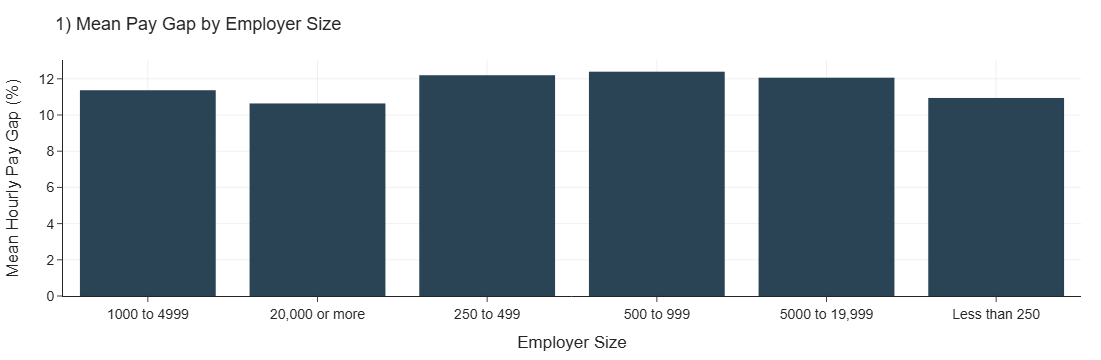

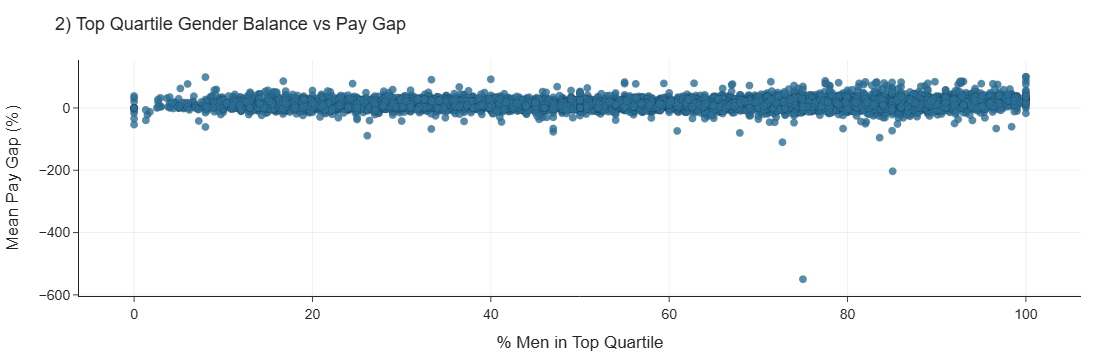

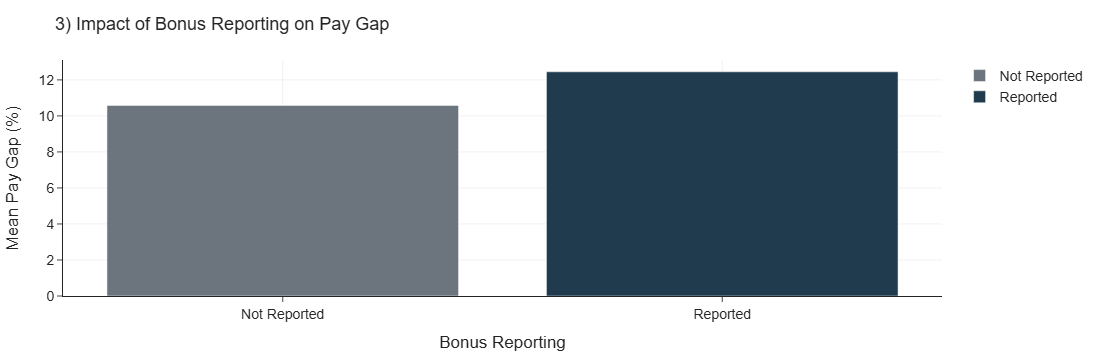

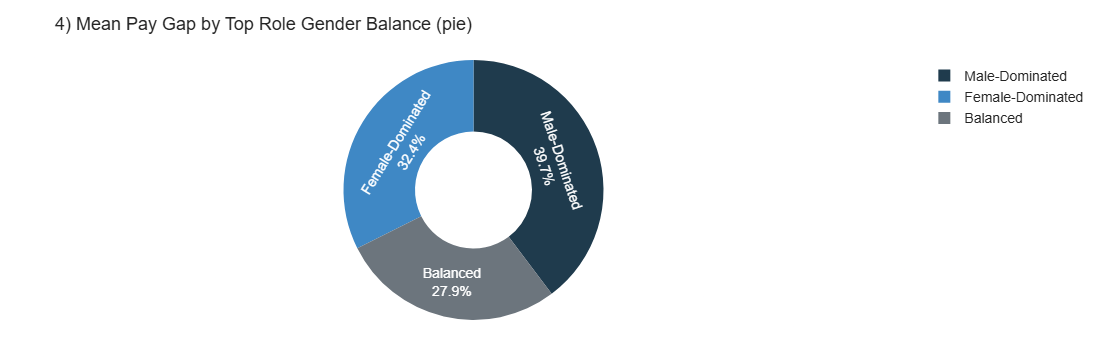

---

_Designed by Vedita Gore | MSc Business Analytics | University of Exeter_

In [28]:
import os, re
import pandas as pd
import plotly.express as px
import plotly.io as pio
from difflib import get_close_matches
from IPython.display import display, Markdown

# ---------- Style: template + brand palette ----------
pio.templates.default = "simple_white"  # clean white background

# Discrete palette (navy → steel → light blue → greys)
PALETTE = ["#1F3B4D", "#2A6F97", "#3F88C5", "#89C2D9", "#A9D6E5", "#6C757D"]

# Specific mapping for TopQuartileType
TQT_COLORS = {
    "Male-Dominated":   "#1F3B4D",  # deep navy
    "Female-Dominated": "#3F88C5",  # clear blue
    "Balanced":         "#6C757D",  # professional grey
}

def style_fig(fig, title=None, xlab=None, ylab=None):
    fig.update_layout(
        title=title or fig.layout.title.text,
        font=dict(family="Arial", size=14),
        title_font=dict(family="Arial", size=18),
        legend_title_text="",
        margin=dict(l=40, r=20, t=60, b=40),
    )
    fig.update_xaxes(title=xlab or fig.layout.xaxis.title.text, showgrid=True, gridcolor="rgba(0,0,0,0.06)")
    fig.update_yaxes(title=ylab or fig.layout.yaxis.title.text, showgrid=True, gridcolor="rgba(0,0,0,0.06)")
    return fig

# ---------- Renderer ----------
def choose_renderer():
    for r in ("plotly_mimetype","notebook_connected","notebook","iframe_connected","iframe"):
        try:
            pio.renderers.default = r
            return r
        except Exception:
            pass
    return pio.renderers.default
choose_renderer()

# ---------- Load CSV ----------
CANDIDATE_PATHS = [
    r"D:\Final Project\UK Gender Pay Gap Data.csv",
    r"D:\Final Project\UK Gender Pay Gap Data - 2024 to 2025.csv",
    "UK Gender Pay Gap Data - 2024 to 2025.csv",
]
path = next((p for p in CANDIDATE_PATHS if os.path.exists(p)), None)
if not path:
    raise FileNotFoundError("CSV not found in:\n- " + "\n- ".join(CANDIDATE_PATHS))
df = pd.read_csv(path)

# ---------- Robust column matching ----------
def norm(s): return re.sub(r'[^a-z0-9]+','', str(s).lower())
colnorm = {c: norm(c) for c in df.columns}
targets = {
    "DiffMeanHourlyPercent": ["diffmeanhourlypercent","diffmeanhourlypaypercent","meanhourlypaygap","meanpaygap","diffmeanhourly"],
    "MaleTopQuartile": ["maletopquartile","percentmaleintopquartile","maletopquartilepercent","topquartilemale"],
    "FemaleTopQuartile": ["femaletopquartile","percentfemaleintopquartile","femaletopquartilepercent","topquartilefemale"],
    "EmployerSize": ["employersize","employersizeband","sizeband"],
    "BonusDataAvailable": ["bonusdataavailable","bonusreported","bonusesreported","bonuspayreported","bonusreporting","bonusavailable"],
    "EmployerName": ["employername","organisationname","companyname"],
}
rename, missing = {}, []
for tgt, cands in targets.items():
    found = next((c for c, cn in colnorm.items() if cn in cands), None)
    (rename.update({found: tgt}) if found else missing.append(tgt))
if rename: df = df.rename(columns=rename)

# ---------- Coerce % strings ----------
for c in ["DiffMeanHourlyPercent","MaleTopQuartile","FemaleTopQuartile"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).replace("%","", regex=False), errors="coerce")

# ---------- Header ----------
display(Markdown("### UK Gender Pay Gap — Inline Dashboard"))
if "EmployerSize" in df.columns:
    sizes = sorted(df["EmployerSize"].dropna().astype(str).unique())
    display(Markdown("**Available EmployerSize values:** " + ", ".join(sizes)))
else:
    display(Markdown("**Column 'EmployerSize' not found.**"))

# ---------- Chart 1: Mean Pay Gap by Employer Size ----------
if {"EmployerSize","DiffMeanHourlyPercent"}.issubset(df.columns) and not df.empty:
    g = df.groupby("EmployerSize", dropna=True)["DiffMeanHourlyPercent"].mean().reset_index()
    fig1 = px.bar(
        g, x="EmployerSize", y="DiffMeanHourlyPercent",
        color_discrete_sequence=[PALETTE[0]],  # single professional tone
        title="1) Mean Pay Gap by Employer Size",
        labels={"EmployerSize":"Employer Size","DiffMeanHourlyPercent":"Mean Hourly Pay Gap (%)"},
    )
    style_fig(fig1).update_traces(marker_line_width=0.5, marker_line_color="rgba(0,0,0,0.15)", opacity=0.95)
    fig1.show()
else:
    display(Markdown("> Skipping chart 1 — need: EmployerSize & DiffMeanHourlyPercent."))

# ---------- Chart 2: Top Quartile Gender Balance vs Pay Gap ----------
if {"MaleTopQuartile","DiffMeanHourlyPercent"}.issubset(df.columns) and not df.empty:
    hover = [c for c in ["EmployerName"] if c in df.columns]
    fig2 = px.scatter(
        df, x="MaleTopQuartile", y="DiffMeanHourlyPercent",
        hover_data=hover,
        color_discrete_sequence=[PALETTE[1]],  # steel blue points
        labels={"MaleTopQuartile":"% Men in Top Quartile","DiffMeanHourlyPercent":"Mean Pay Gap (%)"},
        title="2) Top Quartile Gender Balance vs Pay Gap",
    )
    style_fig(fig2).update_traces(marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color="rgba(0,0,0,0.2)")))
    fig2.show()
else:
    display(Markdown("> Skipping chart 2 — need: MaleTopQuartile & DiffMeanHourlyPercent."))

# ---------- Chart 3: Impact of Bonus Reporting ----------
if {"BonusDataAvailable","DiffMeanHourlyPercent"}.issubset(df.columns) and not df.empty:
    t = df[["BonusDataAvailable","DiffMeanHourlyPercent"]].copy()
    if t["BonusDataAvailable"].dtype == bool:
        t["Bonus Reporting"] = t["BonusDataAvailable"].map({True:"Reported", False:"Not Reported"})
    else:
        t["Bonus Reporting"] = (t["BonusDataAvailable"].astype(str).str.strip().str.lower()
                                .map({"true":"Reported","false":"Not Reported","yes":"Reported","no":"Not Reported"})
                                .fillna("Unknown"))
    bg = t.groupby("Bonus Reporting", dropna=False)["DiffMeanHourlyPercent"].mean().reset_index()
    fig3 = px.bar(
        bg, x="Bonus Reporting", y="DiffMeanHourlyPercent",
        color="Bonus Reporting",
        color_discrete_map={"Reported": PALETTE[0], "Not Reported": PALETTE[5], "Unknown": PALETTE[3]},
        labels={"DiffMeanHourlyPercent":"Mean Pay Gap (%)"},
        title="3) Impact of Bonus Reporting on Pay Gap",
    )
    style_fig(fig3)
    fig3.show()
else:
    display(Markdown("> Skipping chart 3 — need: BonusDataAvailable & DiffMeanHourlyPercent."))

# ---------- Chart 4 (Pie): Mean Pay Gap by Top Role Gender Balance ----------
need = {"MaleTopQuartile","FemaleTopQuartile","DiffMeanHourlyPercent"}
if need.issubset(df.columns) and not df.empty:
    dff = df.copy()

    # Ensure TopQuartileType exists
    if "TopQuartileType" not in dff.columns:
        dff["TopQuartileImbalance"] = dff["MaleTopQuartile"] - dff["FemaleTopQuartile"]
        dff["TopQuartileType"] = dff["TopQuartileImbalance"].apply(
            lambda x: "Male-Dominated" if x > 10
            else ("Female-Dominated" if x < -10 else "Balanced")
        )

    # Fallback colors if TQT_COLORS wasn't defined earlier
    TQT_COLORS = globals().get("TQT_COLORS", {
        "Male-Dominated":   "#1F3B4D",
        "Female-Dominated": "#3F88C5",
        "Balanced":         "#6C757D",
    })

    tg = (
        dff.groupby("TopQuartileType", observed=True)["DiffMeanHourlyPercent"]
           .mean()
           .reset_index()
    )

    import plotly.express as px
    fig4 = px.pie(
        tg,
        names="TopQuartileType",
        values="DiffMeanHourlyPercent",
        color="TopQuartileType",
        color_discrete_map=TQT_COLORS,
        hole=0.45,  # donut style; set to 0 for a full pie
        labels={"TopQuartileType":"Top Quartile Type", "DiffMeanHourlyPercent":"Mean Pay Gap (%)"},
        title="4) Mean Pay Gap by Top Role Gender Balance (pie)"
    )
    # nice labels + hover
    fig4.update_traces(
        textposition="inside",
        textinfo="label+percent",
        hovertemplate="<b>%{label}</b><br>Mean pay gap: %{value:.2f}%<extra></extra>"
    )

    # If you have style_fig from earlier, keep the look consistent
    try:
        fig4 = style_fig(fig4)
    except NameError:
        pass

    # Jupyter:
    fig4.show()
    # Streamlit:
    # st.plotly_chart(fig4, use_container_width=True)
else:
    print("Skipping Chart 4 pie — need columns: MaleTopQuartile, FemaleTopQuartile, DiffMeanHourlyPercent.")

display(Markdown("---"))
display(Markdown("_Designed by Vedita Gore | MSc Business Analytics | University of Exeter_"))

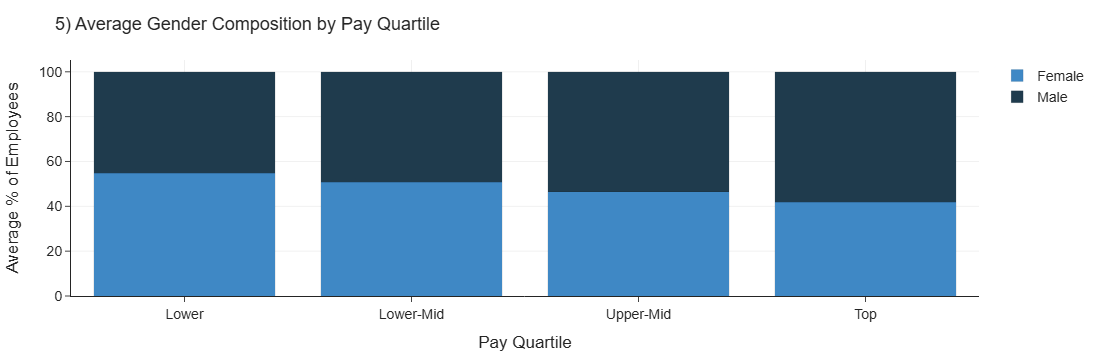

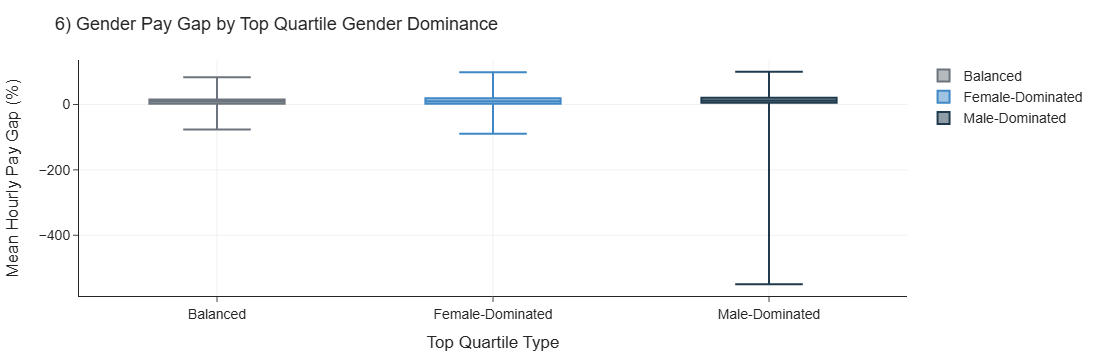

In [16]:
# ---------- Chart 5: Average Gender Composition by Pay Quartile (stacked) ----------
quartiles_female = [
    'FemaleLowerQuartile', 'FemaleLowerMiddleQuartile',
    'FemaleUpperMiddleQuartile', 'FemaleTopQuartile'
]
quartiles_male = [
    'MaleLowerQuartile', 'MaleLowerMiddleQuartile',
    'MaleUpperMiddleQuartile', 'MaleTopQuartile'
]
quartile_labels = ['Lower', 'Lower-Mid', 'Upper-Mid', 'Top']

needed_q = set(quartiles_female + quartiles_male)
if needed_q.issubset(df.columns):
    # coerce % strings to numeric if needed
    for c in needed_q:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace('%','', regex=False), errors='coerce')

    female_means = df[quartiles_female].mean()
    male_means   = df[quartiles_male].mean()

    qdf = pd.DataFrame({
        'Quartile': quartile_labels,
        'Female':   female_means.values,
        'Male':     male_means.values
    })
    qlong = qdf.melt('Quartile', var_name='Gender', value_name='Percent')

    fig5 = px.bar(
        qlong, x='Quartile', y='Percent', color='Gender', barmode='stack',
        color_discrete_map={'Female': PALETTE[2], 'Male': PALETTE[0]},
        labels={'Percent': 'Average % of Employees', 'Quartile': 'Pay Quartile'},
        title='5) Average Gender Composition by Pay Quartile'
    )
    style_fig(fig5)
    fig5.update_traces(marker_line_width=0.5, marker_line_color="rgba(0,0,0,0.15)")
    fig5.show()
else:
    display(Markdown("> Skipping chart 5 — missing one or more quartile columns."))

# ---------- Chart 6: Gender Pay Gap by Top Quartile Gender Dominance (boxplot) ----------
# Ensure TopQuartileType exists; derive if needed
if 'TopQuartileType' not in df.columns and {'MaleTopQuartile','FemaleTopQuartile'}.issubset(df.columns):
    # coerce to numeric
    for c in ['MaleTopQuartile','FemaleTopQuartile']:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace('%','', regex=False), errors='coerce')
    df['TopQuartileImbalance'] = df['MaleTopQuartile'] - df['FemaleTopQuartile']
    df['TopQuartileType'] = df['TopQuartileImbalance'].apply(
        lambda x: 'Male-Dominated' if x > 10 else ('Female-Dominated' if x < -10 else 'Balanced')
    )

if {'TopQuartileType','DiffMeanHourlyPercent'}.issubset(df.columns):
    # ensure pay gap is numeric
    df['DiffMeanHourlyPercent'] = pd.to_numeric(
        df['DiffMeanHourlyPercent'].astype(str).str.replace('%','', regex=False), errors='coerce'
    )
    fig6 = px.box(
        df, x='TopQuartileType', y='DiffMeanHourlyPercent',
        color='TopQuartileType', color_discrete_map=TQT_COLORS,
        points=False,
        labels={'TopQuartileType':'Top Quartile Type', 'DiffMeanHourlyPercent':'Mean Hourly Pay Gap (%)'},
        title='6) Gender Pay Gap by Top Quartile Gender Dominance'
    )
    style_fig(fig6)
    fig6.show()
else:
    display(Markdown("> Skipping chart 6 — need: TopQuartileType and DiffMeanHourlyPercent (or Male/FemaleTopQuartile to derive)."))


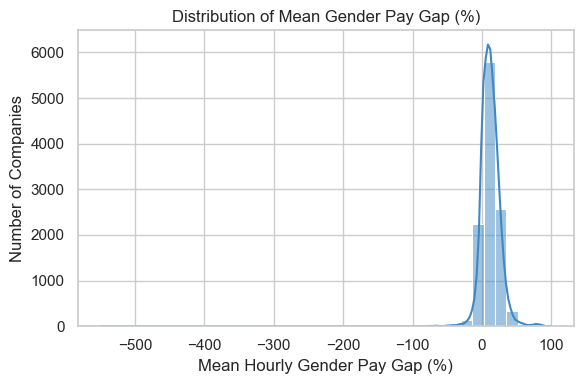

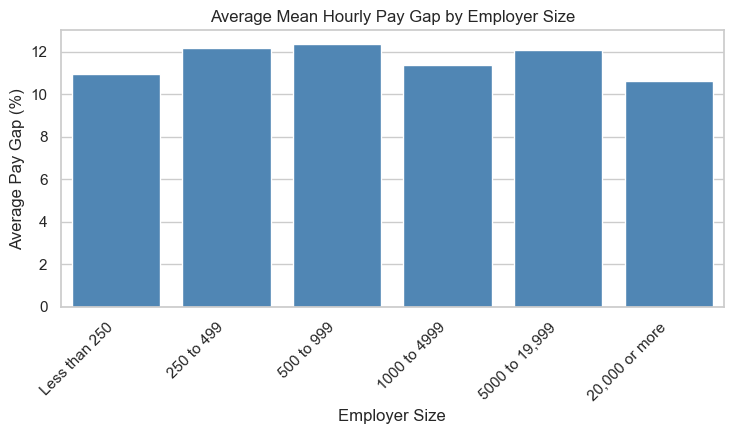

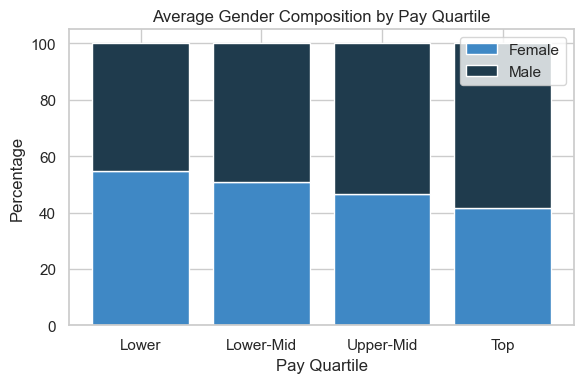

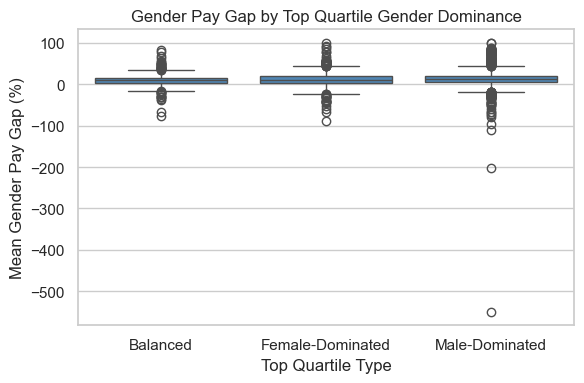


Gender Composition by Pay Quartile:


Quartile  Female (%)  Male (%)
0      Lower        54.7      45.3
1  Lower-Mid        50.7      49.3
2  Upper-Mid        46.4      53.6
3        Top        41.8      58.2


Pay Gap by Top Quartile Gender Dominance:


count   mean    std     min   25%    50%    75%    max
TopQuartileType                                                          
Balanced          1450.0   9.31  11.14  -76.52  2.40   9.10  15.10   83.0
Female-Dominated  3516.0  10.83  12.80  -89.13  2.02   9.81  18.80   99.0
Male-Dominated    6269.0  13.28  16.00 -549.70  5.05  12.40  20.96  100.0

In [20]:
# UK Gender Pay Gap — clean pipeline + visuals + summaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Use your path; optionally add fallbacks if you keep multiple copies.
DATA_PATH = r'D:\Final Project\UK Gender Pay Gap Data.csv'
df = pd.read_csv(DATA_PATH)

# ---------------- Drop unused cols (ignore if missing) + copy ----------------
cols_to_drop = [
    'EmployerName','EmployerId','Address','PostCode','CompanyNumber',
    'CompanyLinkToGPGInfo','ResponsiblePerson','CurrentName',
    'SubmittedAfterTheDeadline','DueDate','DateSubmitted'
]
df_clean = df.drop(columns=cols_to_drop, errors='ignore').copy()

# ---------------- Coerce % strings to numeric where relevant ----------------
percent_like_cols = [
    'DiffMeanHourlyPercent',
    'MaleTopQuartile','FemaleTopQuartile',
    'MaleLowerQuartile','MaleLowerMiddleQuartile','MaleUpperMiddleQuartile',
    'FemaleLowerQuartile','FemaleLowerMiddleQuartile','FemaleUpperMiddleQuartile',
    # add others if your file has them, e.g., 'DiffMedianHourlyPercent', 'DiffMeanBonusPercent', etc.
]
for c in percent_like_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(
            df_clean[c].astype(str).str.replace('%', '', regex=False),
            errors='coerce'
        )

# ---------------- Impute missing values ----------------
# Numeric: both ints and floats (exclude bools)
num_cols = df_clean.select_dtypes(include=['float64','float32','int64','int32']).columns
if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='median')
    df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

# Categorical: objects, categories, bools
cat_cols = df_clean.select_dtypes(include=['object','category','bool']).columns
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

# ---------------- Derive/ensure TopQuartileType (if needed) ----------------
if 'TopQuartileType' not in df_clean.columns:
    if {'MaleTopQuartile','FemaleTopQuartile'}.issubset(df_clean.columns):
        df_clean['TopQuartileImbalance'] = df_clean['MaleTopQuartile'] - df_clean['FemaleTopQuartile']
        df_clean['TopQuartileType'] = df_clean['TopQuartileImbalance'].apply(
            lambda x: 'Male-Dominated' if x > 10 else ('Female-Dominated' if x < -10 else 'Balanced')
        )

# ---------------- Cast to category (only if present) ----------------
for col in ['EmployerSize','TopQuartileType','BonusDataAvailable']:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# Consistent EmployerSize order (if present)
size_order = ["Less than 250","250 to 499","500 to 999","1000 to 4999","5000 to 19,999","20,000 or more"]
if 'EmployerSize' in df_clean.columns:
    df_clean['EmployerSize'] = pd.Categorical(df_clean['EmployerSize'], categories=size_order, ordered=True)

# ---------------- Visual 1: Histogram + KDE ----------------
sns.set(style="whitegrid")
if 'DiffMeanHourlyPercent' in df_clean.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean['DiffMeanHourlyPercent'].dropna(), kde=True, bins=40, color='#3F88C5')
    plt.title('Distribution of Mean Gender Pay Gap (%)')
    plt.xlabel('Mean Hourly Gender Pay Gap (%)')
    plt.ylabel('Number of Companies')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'DiffMeanHourlyPercent' not found — skipping Visual 1.")

# ---------------- Visual 2: Barplot - Avg Pay Gap by Employer Size ----------------
if {'EmployerSize','DiffMeanHourlyPercent'}.issubset(df_clean.columns):
    plt.figure(figsize=(7.5,4.5))
    # observed=True silences the pandas FutureWarning and keeps only present categories
    gap_by_size = (
        df_clean.groupby('EmployerSize', observed=True)['DiffMeanHourlyPercent']
                .mean()
                .reset_index()
                .sort_values('EmployerSize', key=lambda s: s.cat.codes if hasattr(s, "cat") else s)
    )
    # Use single color to avoid seaborn "palette without hue" deprecation
    sns.barplot(data=gap_by_size, x='EmployerSize', y='DiffMeanHourlyPercent', color='#3F88C5')
    plt.title('Average Mean Hourly Pay Gap by Employer Size')
    plt.xlabel('Employer Size')
    plt.ylabel('Average Pay Gap (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Need 'EmployerSize' and 'DiffMeanHourlyPercent' — skipping Visual 2.")

# ---------------- Visual 3: Stacked bar — Gender Composition by Quartile ----------------
quartiles_female = ['FemaleLowerQuartile','FemaleLowerMiddleQuartile','FemaleUpperMiddleQuartile','FemaleTopQuartile']
quartiles_male   = ['MaleLowerQuartile','MaleLowerMiddleQuartile','MaleUpperMiddleQuartile','MaleTopQuartile']
quartile_labels  = ['Lower','Lower-Mid','Upper-Mid','Top']

if set(quartiles_female + quartiles_male).issubset(df_clean.columns):
    female_means = df_clean[quartiles_female].mean()
    male_means   = df_clean[quartiles_male].mean()

    quartile_df = pd.DataFrame({
        'Quartile': quartile_labels,
        'Female': female_means.values,
        'Male':   male_means.values
    })

    plt.figure(figsize=(6,4))
    plt.bar(quartile_df['Quartile'], quartile_df['Female'], label='Female', color='#3F88C5')
    plt.bar(quartile_df['Quartile'], quartile_df['Male'],   bottom=quartile_df['Female'], label='Male', color='#1F3B4D')
    plt.title('Average Gender Composition by Pay Quartile')
    plt.ylabel('Percentage')
    plt.xlabel('Pay Quartile')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Missing one or more quartile columns — skipping Visual 3.")

# ---------------- Visual 4: Boxplot — Pay Gap by Top Quartile Type ----------------
if {'TopQuartileType','DiffMeanHourlyPercent'}.issubset(df_clean.columns):
    plt.figure(figsize=(6,4))
    # Single color to avoid seaborn palette/hue deprecation
    sns.boxplot(data=df_clean, x='TopQuartileType', y='DiffMeanHourlyPercent', color='#3F88C5')
    plt.title('Gender Pay Gap by Top Quartile Gender Dominance')
    plt.xlabel('Top Quartile Type')
    plt.ylabel('Mean Gender Pay Gap (%)')
    plt.tight_layout()
    plt.show()
else:
    print("Need 'TopQuartileType' and 'DiffMeanHourlyPercent' — skipping Visual 4.")

# === Summary tables (robust) ===
import pandas as pd
from IPython.display import display

# Quartile columns
quartiles_female = [
    'FemaleLowerQuartile', 'FemaleLowerMiddleQuartile',
    'FemaleUpperMiddleQuartile', 'FemaleTopQuartile'
]
quartiles_male = [
    'MaleLowerQuartile', 'MaleLowerMiddleQuartile',
    'MaleUpperMiddleQuartile', 'MaleTopQuartile'
]
quartile_labels = ['Lower', 'Lower-Mid', 'Upper-Mid', 'Top']

# Coerce quartile % columns to numeric if needed
for c in quartiles_female + quartiles_male:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c].astype(str).str.replace('%', '', regex=False), errors='coerce')

# Compute means safely
female_means = df_clean[quartiles_female].mean() if set(quartiles_female).issubset(df_clean.columns) else pd.Series([pd.NA]*4)
male_means   = df_clean[quartiles_male].mean()   if set(quartiles_male).issubset(df_clean.columns)   else pd.Series([pd.NA]*4)

quartile_df_table = pd.DataFrame({
    'Quartile': quartile_labels,
    'Female (%)': pd.to_numeric(female_means.values, errors='coerce').round(1),
    'Male (%)':   pd.to_numeric(male_means.values, errors='coerce').round(1)
})

# Ensure TopQuartileType exists (derive if missing)
if 'TopQuartileType' not in df_clean.columns and {'MaleTopQuartile','FemaleTopQuartile'}.issubset(df_clean.columns):
    for c in ['MaleTopQuartile','FemaleTopQuartile']:
        df_clean[c] = pd.to_numeric(df_clean[c].astype(str).str.replace('%', '', regex=False), errors='coerce')
    df_clean['TopQuartileImbalance'] = df_clean['MaleTopQuartile'] - df_clean['FemaleTopQuartile']
    df_clean['TopQuartileType'] = df_clean['TopQuartileImbalance'].apply(
        lambda x: 'Male-Dominated' if x > 10 else ('Female-Dominated' if x < -10 else 'Balanced')
    )

# Make sure pay gap is numeric
if 'DiffMeanHourlyPercent' in df_clean.columns:
    df_clean['DiffMeanHourlyPercent'] = pd.to_numeric(df_clean['DiffMeanHourlyPercent'], errors='coerce')

# Summary stats table (silence future observed warning)
if {'TopQuartileType','DiffMeanHourlyPercent'}.issubset(df_clean.columns):
    top_quartile_stats = (
        df_clean.groupby('TopQuartileType', observed=True)['DiffMeanHourlyPercent']
                .describe()
                .round(2)
    )
else:
    top_quartile_stats = pd.DataFrame({'Note': ['Missing TopQuartileType or DiffMeanHourlyPercent']})

print("\nGender Composition by Pay Quartile:")
try:
    display(quartile_df_table)
except Exception:
    print(quartile_df_table.to_string(index=False))

print("\nPay Gap by Top Quartile Gender Dominance:")
try:
    display(top_quartile_stats)
except Exception:
    print(top_quartile_stats.to_string())

In [22]:
# Re-import libraries and re-load data after environment reset
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("D:\\Final Project\\UK Gender Pay Gap Data.csv")

# Drop unnecessary columns
columns_to_drop = ['EmployerName', 'EmployerId', 'Address', 'PostCode', 'CompanyNumber',
                   'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'CurrentName',
                   'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']
df_clean = df.drop(columns=columns_to_drop)

# Impute missing values
num_cols = df_clean.select_dtypes(include='float64').columns
cat_cols = df_clean.select_dtypes(include=['object', 'bool']).columns

num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

# Convert to category
df_clean['EmployerSize'] = df_clean['EmployerSize'].astype('category')
df_clean['TopQuartileType'] = df_clean['TopQuartileType'].astype('category')
df_clean['BonusDataAvailable'] = df_clean['BonusDataAvailable'].astype('category')

# Define target and features
target = 'DiffMeanHourlyPercent'

numerical_features = [
    'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent',
    'MaleLowerQuartile', 'FemaleLowerQuartile',
    'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
    'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
    'MaleTopQuartile', 'FemaleTopQuartile',
    'TopQuartileImbalance'
]

categorical_features = ['EmployerSize', 'BonusDataAvailable', 'TopQuartileType']

X = df_clean[numerical_features + categorical_features]
y = df_clean[target]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate model
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(5.87615196093193, 0.48296416551267307)

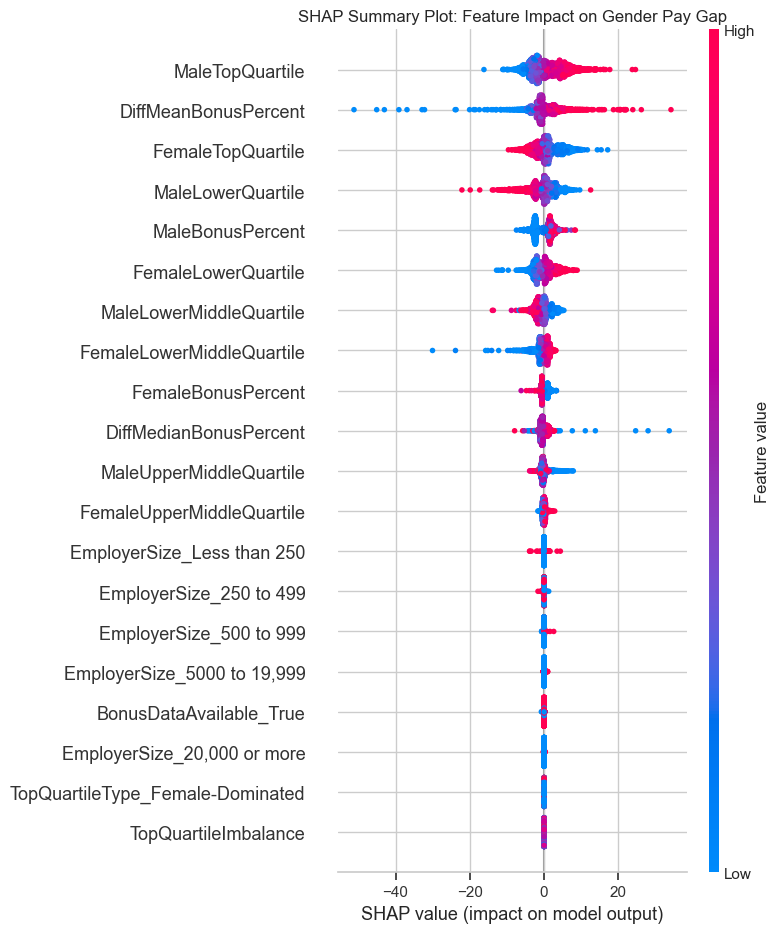

In [52]:
# Fixing the data type issue by ensuring all features are float64 before SHAP
import shap
import matplotlib.pyplot as plt

# Recast all columns to float (excluding any hidden object-type leftovers)
X_test_fixed = X_test.copy()
X_test_fixed = X_test_fixed.astype('float64')
X_train_fixed = X_train.astype('float64')  # Also fix training data

# Create SHAP explainer using the fixed data
explainer = shap.Explainer(xgb_model, X_train_fixed)
shap_values = explainer(X_test_fixed)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_fixed, show=False)

plt.title("SHAP Summary Plot: Feature Impact on Gender Pay Gap")
plt.tight_layout()
plt.show()

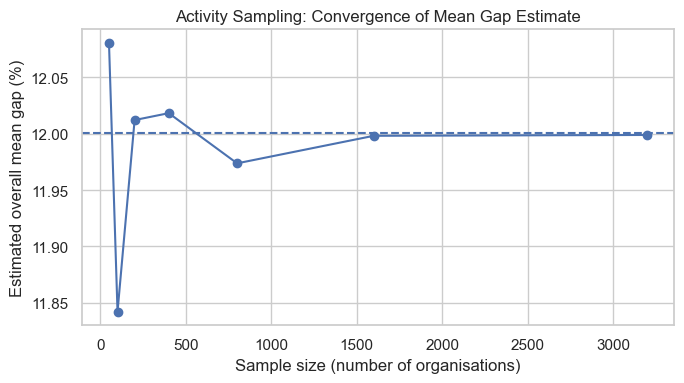

### Quartile-by-Gender Sampling (n=200)

Quartile  Gender  Observed Count  Estimate (%)  95% CI Low (%)  \
0      Lower  Female              26          13.0            9.03   
1      Lower    Male              24          12.0            8.20   
2  Lower-Mid  Female              27          13.5            9.45   
3  Lower-Mid    Male              27          13.5            9.45   
4        Top  Female              25          12.5            8.61   
5        Top    Male              24          12.0            8.20   
6  Upper-Mid  Female              19           9.5            6.17   
7  Upper-Mid    Male              28          14.0            9.87   

   95% CI High (%)  True Share (%)  
0            18.37           13.68  
1            17.23           11.32  
2            18.93           12.68  
3            18.93           12.32  
4            17.80           10.45  
5            17.23           14.55  
6            14.36           11.60  
7            19.49           13.40

### Quartile-by-Gender Sampling (n=1000)

Quartile  Gender  Observed Count  Estimate (%)  95% CI Low (%)  \
0      Lower  Female             141          14.1           12.08   
1      Lower    Male             120          12.0           10.13   
2  Lower-Mid  Female             113          11.3            9.48   
3  Lower-Mid    Male             124          12.4           10.50   
4        Top  Female             116          11.6            9.76   
5        Top    Male             146          14.6           12.55   
6  Upper-Mid  Female             109          10.9            9.12   
7  Upper-Mid    Male             131          13.1           11.15   

   95% CI High (%)  True Share (%)  
0            16.39           13.68  
1            14.16           11.32  
2            13.41           12.68  
3            14.59           12.32  
4            13.73           10.45  
5            16.92           14.55  
6            12.98           11.60  
7            15.33           13.40

### Quartile-by-Gender Sampling (n=5000)

Quartile  Gender  Observed Count  Estimate (%)  95% CI Low (%)  \
0      Lower  Female             691         13.82           12.89   
1      Lower    Male             608         12.16           11.28   
2  Lower-Mid  Female             643         12.86           11.96   
3  Lower-Mid    Male             616         12.32           11.44   
4        Top  Female             510         10.20            9.39   
5        Top    Male             704         14.08           13.14   
6  Upper-Mid  Female             594         11.88           11.01   
7  Upper-Mid    Male             634         12.68           11.79   

   95% CI High (%)  True Share (%)  
0            14.80           13.68  
1            13.10           11.32  
2            13.82           12.68  
3            13.26           12.32  
4            11.07           10.45  
5            15.07           14.55  
6            12.81           11.60  
7            13.63           13.40

### Aggregated Female Shares from Sampling

n Overall Female Share (%) Overall Female 95% CI  \
0   200                     48.5        (41.67, 55.39)   
1  1000                     47.9         (44.82, 51.0)   
2  5000                    48.76        (47.38, 50.15)   

  Top Quartile Female Share (%) Top Quartile Female 95% CI  
0                         51.02             (37.47, 64.42)  
1                         44.27             (38.39, 50.33)  
2                         42.01             (39.26, 44.81)

### Leadership Category Sampling Summary

n  Male-Dominated Estimate (%)          95% CI  True (%)
0   100                        58.00   (48.21, 67.2)      55.8
1   400                        56.00   (51.1, 60.78)      55.8
2  1600                        54.81  (52.37, 57.24)      55.8


Saved report to: C:\Users\vedit\activity_sampling_summary.csv


In [35]:
import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Z-score helpers (SciPy optional) ----------------
try:
    from scipy.stats import norm
    def z_from_conf(conf: float) -> float:
        return float(norm.ppf(0.5 + conf/2.0))
except Exception:
    from statistics import NormalDist
    def z_from_conf(conf: float) -> float:
        # Invert standard normal CDF using Python stdlib
        return float(NormalDist().inv_cdf(0.5 + conf/2.0))

def proportion_confint_wilson(k: int, n: int, alpha: float = 0.05):
    """
    Wilson 2-sided CI for a binomial proportion.
    Returns (p_hat, ci_low, ci_high).
    """
    if n == 0:
        return (np.nan, np.nan, np.nan)
    z = z_from_conf(1.0 - alpha)   # e.g., alpha=0.05 -> conf=0.95
    p = k / n
    denom = 1.0 + (z**2)/n
    center = (p + (z**2)/(2*n)) / denom
    half = (z * math.sqrt((p*(1-p) + (z**2)/(4*n)) / n)) / denom
    return p, center - half, center + half

def needed_sample_size(p: float = 0.5, moe: float = 0.02, conf: float = 0.95) -> int:
    """n ≈ z^2 * p(1-p) / moe^2; worst case at p=0.5 unless you set p."""
    z = z_from_conf(conf)
    return math.ceil((z**2) * p * (1 - p) / (moe**2))

# Derive from df_clean (your cleaned UK GPG dataset)
# 1) Quartile composition (female % averages across employers)
female_pct_by_quartile = {
    "Lower":       pd.to_numeric(df_clean["FemaleLowerQuartile"], errors="coerce").mean(),
    "Lower-Mid":   pd.to_numeric(df_clean["FemaleLowerMiddleQuartile"], errors="coerce").mean(),
    "Upper-Mid":   pd.to_numeric(df_clean["FemaleUpperMiddleQuartile"], errors="coerce").mean(),
    "Top":         pd.to_numeric(df_clean["FemaleTopQuartile"], errors="coerce").mean(),
}
male_pct_by_quartile = {q: 100 - female_pct_by_quartile[q] for q in female_pct_by_quartile}

# 2) Leadership dominance categories
#    (ensure TopQuartileType already derived as in your pipeline)
leadership_counts = df_clean["TopQuartileType"].value_counts(dropna=False).to_dict()

# Mean pay gap by category (make sure DiffMeanHourlyPercent is numeric)
tmp = df_clean.copy()
tmp["DiffMeanHourlyPercent"] = pd.to_numeric(tmp["DiffMeanHourlyPercent"], errors="coerce")
leadership_mean_gap = tmp.groupby("TopQuartileType", observed=True)["DiffMeanHourlyPercent"].mean().round(2).to_dict()

# Build the proportions DataFrame used later
leadership_df = (
    pd.Series(leadership_counts, name="Count")
      .rename_axis("Category").reset_index()
)
leadership_df["Proportion"] = leadership_df["Count"] / leadership_df["Count"].sum()

# ---------------- Simulators ----------------
rng = np.random.default_rng(42)

def simulate_quartile_gender_sampling(n_obs: int, rng) -> pd.DataFrame:
    idx_draws = rng.choice(len(state_labels), size=n_obs, p=state_probs)
    counts = np.bincount(idx_draws, minlength=len(state_labels))

    rows = []
    for i, (q, g) in enumerate(state_labels):
        k = int(counts[i])
        p_hat, lo, hi = proportion_confint_wilson(k, n_obs)
        rows.append({
            "Quartile": q,
            "Gender": g,
            "Observed Count": k,
            "Estimate (%)": round(100*p_hat, 2),
            "95% CI Low (%)": round(100*lo, 2),
            "95% CI High (%)": round(100*hi, 2),
            "True Share (%)": round(100*state_probs[i], 2),
        })
    df = pd.DataFrame(rows).sort_values(["Quartile", "Gender"], ignore_index=True)
    return df

def aggregate_shares(df: pd.DataFrame) -> dict:
    n = int(df["Observed Count"].sum())
    k_f_all = int(df.loc[df["Gender"]=="Female", "Observed Count"].sum())
    p_all, lo_all, hi_all = proportion_confint_wilson(k_f_all, n)

    df_top = df[df["Quartile"]=="Top"]
    k_top = int(df_top.loc[df_top["Gender"]=="Female", "Observed Count"].sum())
    n_top = int(df_top["Observed Count"].sum())
    p_top, lo_top, hi_top = proportion_confint_wilson(k_top, n_top) if n_top > 0 else (np.nan, np.nan, np.nan)

    return {
        "n": n,
        "Overall Female Share (%)": round(100*p_all, 2),
        "Overall Female 95% CI": (round(100*lo_all, 2), round(100*hi_all, 2)),
        "Top Quartile Female Share (%)": round(100*p_top, 2),
        "Top Quartile Female 95% CI": (round(100*lo_top, 2), round(100*hi_top, 2)),
    }

# Run simulations
sample_sizes = [200, 1000, 5000]
quartile_results = {n: simulate_quartile_gender_sampling(n, rng) for n in sample_sizes}
agg_summaries = {n: aggregate_shares(quartile_results[n]) for n in sample_sizes}

# Leadership sampling
leadership_df = pd.DataFrame({"Category": list(leadership_counts.keys()),
                              "Count": list(leadership_counts.values())})
leadership_df["Proportion"] = leadership_df["Count"] / leadership_df["Count"].sum()

def simulate_leadership_sampling(n_obs: int, rng) -> dict:
    cats = leadership_df["Category"].tolist()
    probs = leadership_df["Proportion"].to_numpy()
    draws = rng.choice(len(cats), size=n_obs, p=probs)
    k_male_dom = int((draws == cats.index("Male-Dominated")).sum())
    p_hat, lo, hi = proportion_confint_wilson(k_male_dom, n_obs)
    return {
        "n": n_obs,
        "Male-Dominated Estimate (%)": round(100*p_hat, 2),
        "95% CI": (round(100*lo, 2), round(100*hi, 2)),
        "True (%)": round(100*probs[cats.index("Male-Dominated")], 2),
    }

leadership_samples = [100, 400, 1600]
leadership_results = [simulate_leadership_sampling(n, rng) for n in leadership_samples]

# Sample size needed for ±2% around estimated male-dominated share
md = leadership_df.loc[leadership_df["Category"].eq("Male-Dominated"), "Proportion"]

if md.empty:
    raise ValueError("Male-Dominated row not found in leadership_df")

# Get the scalar safely (no FutureWarning)
p_male_dom_true = md.iat[0]          # already a Python/NumPy float
# p_male_dom_true = float(md.iat[0])  # optional explicit cast

n_needed_moe2 = needed_sample_size(p=p_male_dom_true, moe=0.02, conf=0.95)

# Weighted mean pay gap (true) and sampling convergence
true_weighted_mean_gap = (
    sum(leadership_mean_gap[c]*leadership_counts[c] for c in leadership_counts)
    / leadership_df["Count"].sum()
)

def simulate_weighted_gap(n_obs: int, rng) -> float:
    cats = leadership_df["Category"].tolist()
    probs = leadership_df["Proportion"].to_numpy()
    draws = rng.choice(len(cats), size=n_obs, p=probs)
    sampled_gaps = np.array([leadership_mean_gap[cats[i]] for i in draws], dtype=float)
    return float(sampled_gaps.mean())

grid = [50, 100, 200, 400, 800, 1600, 3200]
gap_df = pd.DataFrame({"n": grid, "Estimated Mean Gap (%)": [simulate_weighted_gap(n, rng) for n in grid]})

# ---------------- Visual: convergence of estimated mean gap ----------------
plt.figure(figsize=(7,4))
plt.plot(gap_df["n"], gap_df["Estimated Mean Gap (%)"], marker="o")
plt.axhline(true_weighted_mean_gap, linestyle="--")
plt.xlabel("Sample size (number of organisations)")
plt.ylabel("Estimated overall mean gap (%)")
plt.title("Activity Sampling: Convergence of Mean Gap Estimate")
plt.tight_layout()
plt.show()

# ---------------- Tables ----------------
summary_quartile_tables = {n: df for n, df in quartile_results.items()}
leadership_summary_table = pd.DataFrame(leadership_results)
agg_summary_table = pd.DataFrame(agg_summaries).T.reset_index(drop=True)

# Display in Jupyter (fallback to print if IPython unavailable)
def show_df(title: str, dframe: pd.DataFrame):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"### {title}"))
        display(dframe)
    except Exception:
        print(f"\n{title}")
        print(dframe.to_string(index=False))

show_df("Quartile-by-Gender Sampling (n=200)",  summary_quartile_tables[200])
show_df("Quartile-by-Gender Sampling (n=1000)", summary_quartile_tables[1000])
show_df("Quartile-by-Gender Sampling (n=5000)", summary_quartile_tables[5000])
show_df("Aggregated Female Shares from Sampling", agg_summary_table)
show_df("Leadership Category Sampling Summary", leadership_summary_table)

# Save concise CSV report to current directory
report = {"true_weighted_mean_gap": true_weighted_mean_gap,
          "n_needed_male_dom_moe2pct": n_needed_moe2}
report_path = os.path.abspath("activity_sampling_summary.csv")
pd.DataFrame([report]).to_csv(report_path, index=False)
print("\nSaved report to:", report_path)

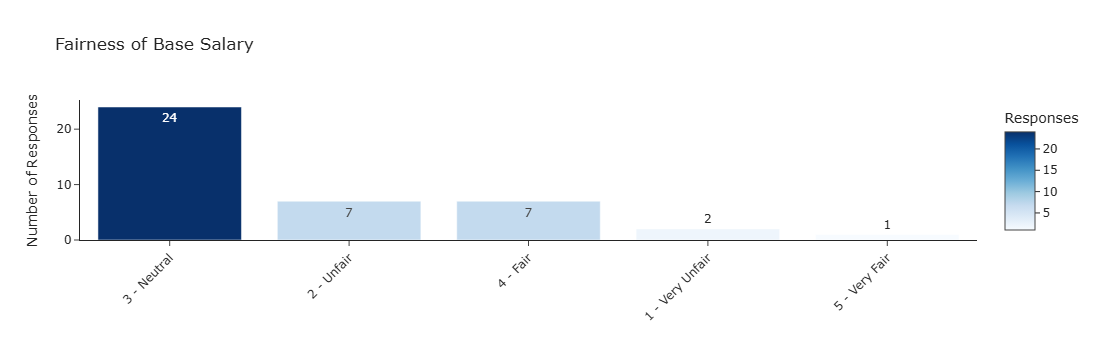

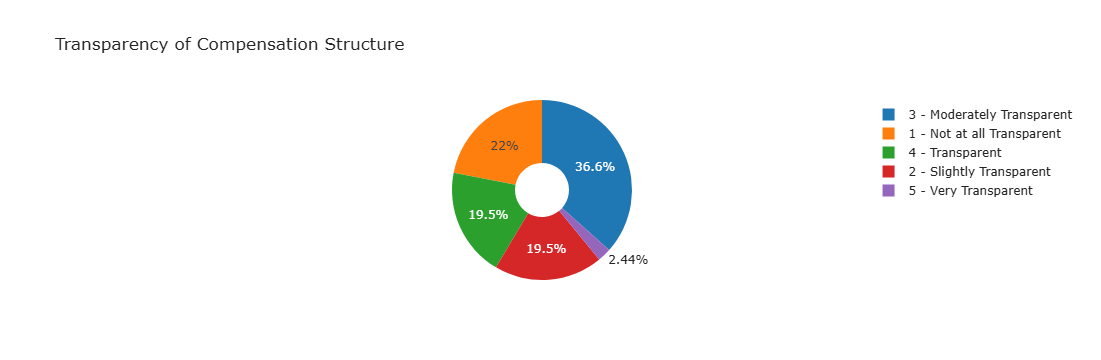

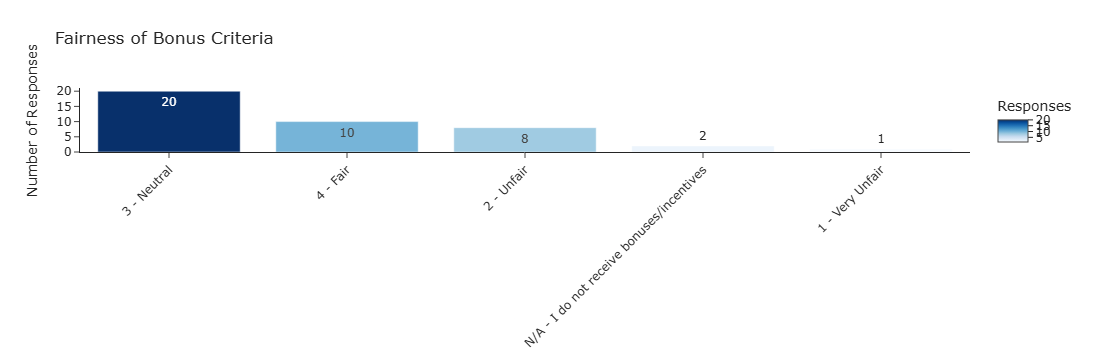

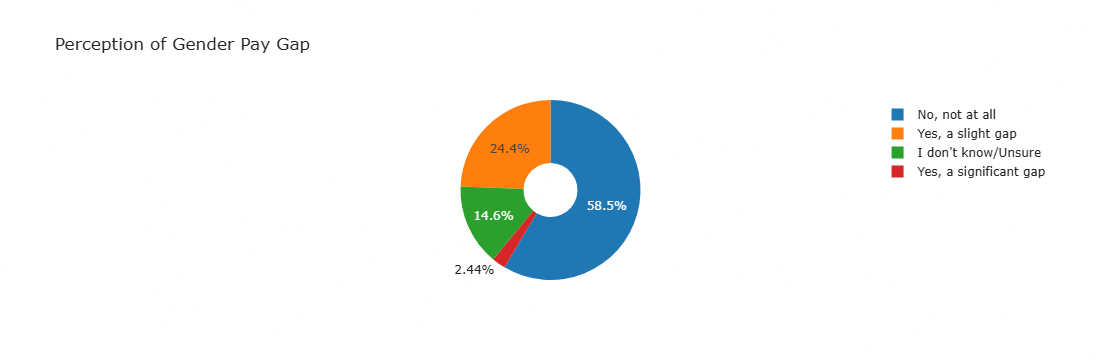

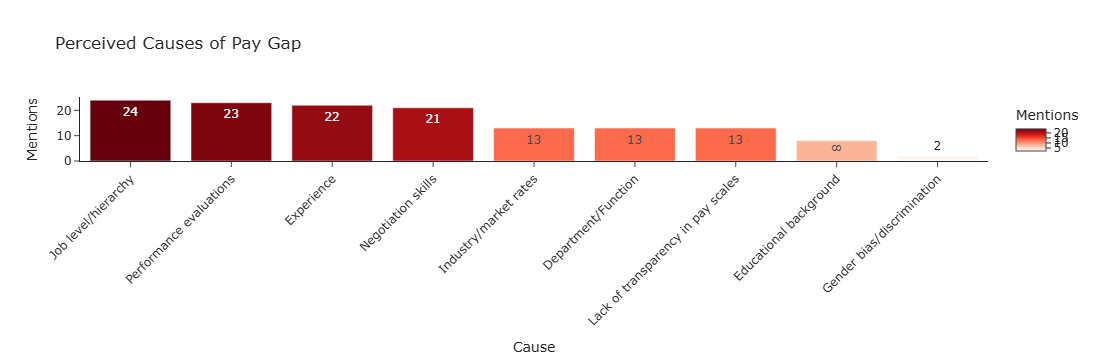

In [36]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = r"D:\Final Project\Employee Pay Equity & Workplace Experience Survey.csv\Employee Pay Equity & Workplace Experience Survey.csv"
df = pd.read_csv(file_path)

# Relevant columns for Pay Equity
pay_equity_cols = {
    "Fairness of Base Salary": "How fair do you believe your current base salary is compared to others in similar roles with similar experience within your organization?",
    "Transparency": "How transparent do you find the compensation structure and salary bands within your organization?",
    "Bonus Fairness": "If applicable, how fair do you believe the criteria for receiving bonuses or performance-based incentives are?",
    "Gender Pay Gap Perception": "Do you believe there is a gender pay gap within your organization?",
    "Causes of Pay Gap": "What factors do you believe contribute to any perceived pay disparities in your organization? (Select all that apply)"
}

# Function to plot bar chart
def plot_bar(column, title):
    counts = df[column].value_counts(dropna=False).reset_index()
    counts.columns = [column, "Responses"]
    fig = px.bar(counts, x=column, y="Responses", 
                 title=title, text="Responses", 
                 color="Responses", color_continuous_scale="Blues")
    fig.update_layout(xaxis_title="", yaxis_title="Number of Responses", 
                      xaxis_tickangle=-45)
    fig.show()

# Function to plot pie chart
def plot_pie(column, title):
    counts = df[column].value_counts(dropna=False).reset_index()
    counts.columns = [column, "Responses"]
    fig = px.pie(counts, values="Responses", names=column, 
                 title=title, hole=0.3)
    fig.show()

# Bar chart: Fairness of Base Salary
plot_bar(pay_equity_cols["Fairness of Base Salary"], "Fairness of Base Salary")

# Pie chart: Transparency
plot_pie(pay_equity_cols["Transparency"], "Transparency of Compensation Structure")

# Bar chart: Bonus Fairness
plot_bar(pay_equity_cols["Bonus Fairness"], "Fairness of Bonus Criteria")

# Pie chart: Gender Pay Gap Perception
plot_pie(pay_equity_cols["Gender Pay Gap Perception"], "Perception of Gender Pay Gap")

# Multi-select question: Causes of Pay Gap (split and count)
causes_series = df[pay_equity_cols["Causes of Pay Gap"]].dropna().str.split(';').explode().str.strip()
cause_counts = causes_series.value_counts().reset_index()
cause_counts.columns = ["Cause", "Mentions"]

fig = px.bar(cause_counts, x="Cause", y="Mentions", 
             title="Perceived Causes of Pay Gap", 
             text="Mentions", color="Mentions", 
             color_continuous_scale="Reds")
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [39]:
# ========= Fix mapping (gender + Likert) + sampling + t-tests =========
import re, math, numpy as np, pandas as pd

# ---- 0) Choose your items (same labels you used earlier) ----
pay_equity_cols = {
    "Fairness of Base Salary": "How fair do you believe your current base salary is compared to others in similar roles with similar experience within your organization?",
    "Transparency": "How transparent do you find the compensation structure and salary bands within your organization?",
    "Bonus Fairness": "If applicable, how fair do you believe the criteria for receiving bonuses or performance-based incentives are?",
}

# ---- 1) Find/normalize gender ----
def find_gender_col(df):
    cands = [c for c in df.columns if "gender" in c.lower()]
    # Pick the one with the fewest unique categories (usually the cleanest)
    if not cands: 
        return None
    return min(cands, key=lambda c: df[c].astype(str).nunique(dropna=True))

MALE_TOKENS   = {"male","man","m","cis male","male (cis)","man (cis)","trans male","trans man"}
FEMALE_TOKENS = {"female","woman","f","cis female","female (cis)","woman (cis)","trans female","trans woman"}

def normalize_gender_val(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    # quick wins
    if s in MALE_TOKENS or s.startswith("male") or s.startswith("man"):
        return "Male"
    if s in FEMALE_TOKENS or s.startswith("female") or s.startswith("woman"):
        return "Female"
    # short codes
    if s in {"m","m."}: return "Male"
    if s in {"f","f."}: return "Female"
    # everything else (non-binary, prefer not to say, etc.) => NaN for 2-group t-test
    return np.nan

gender_col = find_gender_col(df)
if not gender_col:
    print("⚠️ Couldn’t find a gender column. Make sure a column name contains 'gender'.")
else:
    df["_Gender2"] = df[gender_col].apply(normalize_gender_val)
    print("Detected gender column:", gender_col)
    print(df["_Gender2"].value_counts(dropna=False))

# ---- 2) Likert → numeric (robust) ----
LIKERT_ORDERS = [
    # very negative → very positive
    ["very unfair","unfair","neutral","fair","very fair"],
    ["not at all transparent","slightly transparent","moderately transparent","mostly transparent","very transparent","completely transparent"],
    ["strongly disagree","disagree","neutral","agree","strongly agree"],
]

def likert_to_num_series(s):
    # already numeric?
    s_num = pd.to_numeric(s, errors="coerce")
    if s_num.notna().any() and s_num.astype(str).str.match(r"^\d+(\.\d+)?$").mean() > 0.5:
        return s_num  # looks numeric already

    # try pattern like "1 - Very fair"
    def parse_prefixed_number(v):
        m = re.match(r"^\s*([1-9])\b", str(v).strip())
        return float(m.group(1)) if m else np.nan
    pre = s.apply(parse_prefixed_number)
    if pre.notna().sum() >= 0.5 * len(s.dropna()):
        return pre

    # map using known orders
    low = s.astype(str).str.strip().str.lower()
    out = pd.Series(np.nan, index=s.index, dtype="float")
    for order in LIKERT_ORDERS:
        # build mapping dict: exact match
        mp = {lab: i+1 for i, lab in enumerate(order)}
        mask = low.isin(mp.keys())
        if mask.sum() > 0 and out.isna().all():  # first successful order
            out.loc[mask] = low.loc[mask].map(mp).astype(float)
    return out

# build numeric columns
for short, col in pay_equity_cols.items():
    if col not in df.columns:
        print(f"⚠️ Missing column: {col}")
        continue
    df[f"num__{short}"] = likert_to_num_series(df[col])
    print(f"{short}: non-null numeric = {df[f'num__{short}'].notna().sum()}")

# ---- 3) Quick diagnostics ----
for short in pay_equity_cols:
    coln = f"num__{short}"
    if coln in df.columns:
        nn = df[coln].notna().sum()
        print(f"[{short}] usable n = {nn}")

if "_Gender2" in df.columns:
    for g in ["Male","Female",np.nan]:
        cnt = (df["_Gender2"]==g).sum() if g is not np.nan else df["_Gender2"].isna().sum()
        print(f"Gender={g}: {cnt}")

# ---- 4) Sampling and bootstrap CIs ----
def bootstrap_mean_ci(x, B=5000, alpha=0.05, rng=None):
    x = pd.to_numeric(pd.Series(x), errors="coerce").dropna().to_numpy()
    if x.size == 0: return (np.nan, (np.nan, np.nan))
    rng = np.random.default_rng(123) if rng is None else rng
    boots = rng.choice(x, size=(B, x.size), replace=True).mean(axis=1)
    lo, hi = np.quantile(boots, [alpha/2, 1-alpha/2])
    return (float(x.mean()), (float(lo), float(hi)))

rng = np.random.default_rng(42)
N_SAMPLE = min(300, len(df))
df_sample = df.sample(n=N_SAMPLE, random_state=42)

rows = []
for short in pay_equity_cols:
    coln = f"num__{short}"
    if coln not in df_sample: continue
    m, (lo, hi) = bootstrap_mean_ci(df_sample[coln], rng=rng)
    rows.append({"Metric": short, "Group": "Overall", "Mean": m, "CI Low": lo, "CI High": hi, "n": int(df_sample[coln].notna().sum())})
    if "_Gender2" in df_sample.columns:
        for g in ["Male","Female"]:
            s = df_sample.loc[df_sample["_Gender2"]==g, coln]
            m, (lo, hi) = bootstrap_mean_ci(s, rng=rng)
            rows.append({"Metric": short, "Group": g, "Mean": m, "CI Low": lo, "CI High": hi, "n": int(s.notna().sum())})
bootstrap_table = pd.DataFrame(rows)
print("\nBootstrap means (sampled) with 95% CI:")
print(bootstrap_table.round(2).to_string(index=False))

# ---- 5) Welch t-tests (Male vs Female) with permutation fallback ----
def cohens_d(x, y):
    x = pd.to_numeric(pd.Series(x), errors="coerce").dropna().to_numpy()
    y = pd.to_numeric(pd.Series(y), errors="coerce").dropna().to_numpy()
    if len(x)<2 or len(y)<2: return np.nan
    nx, ny = len(x), len(y)
    sx2, sy2 = np.var(x, ddof=1), np.var(y, ddof=1)
    sp2 = ((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2)
    return (x.mean()-y.mean())/math.sqrt(sp2) if sp2>0 else np.nan

def welch_or_perm(x, y, rng=None, B=10000):
    x = pd.to_numeric(pd.Series(x), errors="coerce").dropna().to_numpy()
    y = pd.to_numeric(pd.Series(y), errors="coerce").dropna().to_numpy()
    if len(x)<2 or len(y)<2:
        return {"method":"insufficient data","t":np.nan,"p":np.nan}
    try:
        from scipy.stats import ttest_ind
        r = ttest_ind(x, y, equal_var=False, nan_policy="omit")
        return {"method":"Welch t-test (SciPy)","t":float(r.statistic),"p":float(r.pvalue)}
    except Exception:
        rng = np.random.default_rng(1234) if rng is None else rng
        obs = abs(x.mean()-y.mean())
        comb = np.concatenate([x,y])
        nx = len(x)
        ge = 0
        for _ in range(B):
            rng.shuffle(comb)
            ge += abs(comb[:nx].mean()-comb[nx:].mean()) >= obs
        return {"method":f"Permutation (B={B})","t":np.nan,"p":(ge+1)/(B+1)}

tests = []
if "_Gender2" in df.columns:
    for short in pay_equity_cols:
        coln = f"num__{short}"
        if coln not in df: continue
        xm = df.loc[df["_Gender2"]=="Male",   coln]
        xf = df.loc[df["_Gender2"]=="Female", coln]
        res = welch_or_perm(xm, xf, rng=rng)
        tests.append({
            "Metric": short, "Method": res["method"], "t_stat": res["t"], "p_value": res["p"],
            "Cohen_d": cohens_d(xm, xf),
            "n_male": int(pd.to_numeric(xm, errors="coerce").notna().sum()),
            "n_female": int(pd.to_numeric(xf, errors="coerce").notna().sum())
        })
ttest_table = pd.DataFrame(tests)
print("\nMale vs Female tests (whole dataset):")
print(ttest_table.round(4).to_string(index=False))


Detected gender column: How would you describe your gender?
_Gender2
Male      20
Female    19
NaN        2
Name: count, dtype: int64
Fairness of Base Salary: non-null numeric = 41
Transparency: non-null numeric = 41
Bonus Fairness: non-null numeric = 39
[Fairness of Base Salary] usable n = 41
[Transparency] usable n = 41
[Bonus Fairness] usable n = 39
Gender=Male: 20
Gender=Female: 19
Gender=nan: 2

Bootstrap means (sampled) with 95% CI:
                 Metric   Group  Mean  CI Low  CI High  n
Fairness of Base Salary Overall  2.95    2.71     3.20 41
Fairness of Base Salary    Male  3.15    2.75     3.50 20
Fairness of Base Salary  Female  2.79    2.47     3.11 19
           Transparency Overall  2.61    2.27     2.95 41
           Transparency    Male  2.85    2.40     3.30 20
           Transparency  Female  2.47    2.00     3.00 19
         Bonus Fairness Overall  3.00    2.77     3.23 39
         Bonus Fairness    Male  2.94    2.56     3.33 18
         Bonus Fairness  Female  3.